# 🧪 Comprehensive LMSD SDF Database search
Creates a comprehensive analytical pipeline to extract maximum insights from this valuable dataset.
LMSD.sdf/structures.sdf

🔍 Setting Up Your Search Notebook


In [1]:
# LIPID MAPS Database Search Notebook
# ====================================

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools, AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

print("🔬 LIPID MAPS Database Search System")
print("="*50)


🔬 LIPID MAPS Database Search System


## 📥 Loading the LIPID MAPS SDF Database



In [2]:
class LipidMapsSearcher:
    def __init__(self, sdf_path):
        self.sdf_path = sdf_path
        self.df = None
        self.lipid_categories = {}
        
    def load_lipid_database(self, sample_size=None):
        """Load LIPID MAPS SDF database with lipid-specific properties"""
        print(f"📂 Loading LIPID MAPS database: {self.sdf_path}")
        
        try:
            # Load SDF using RDKit's PandasTools
            self.df = PandasTools.LoadSDF(self.sdf_path, 
                                         molColName='Molecule',
                                         smilesName='SMILES',
                                         includeFingerprints=False)
            
            print(f"✅ Successfully loaded {len(self.df)} lipid structures")
            
            # Sample if requested
            if sample_size and sample_size < len(self.df):
                self.df = self.df.sample(sample_size, random_state=42)
                print(f"📊 Using sample of {sample_size} lipids")
            
            # Basic preprocessing
            self._preprocess_lipid_data()
            self._analyze_lipid_categories()
            
            return True
            
        except Exception as e:
            print(f"❌ Error loading SDF file: {e}")
            return False
    
    def _preprocess_lipid_data(self):
        """Preprocess and enhance lipid data"""
        print("🔄 Preprocessing lipid data...")
        
        # Add calculated molecular properties
        self.df['Molecular_Weight'] = self.df['Molecule'].apply(
            lambda x: Descriptors.MolWt(x) if x else None
        )
        self.df['LogP'] = self.df['Molecule'].apply(
            lambda x: Descriptors.MolLogP(x) if x else None
        )
        self.df['TPSA'] = self.df['Molecule'].apply(
            lambda x: Descriptors.TPSA(x) if x else None
        )
        self.df['HBD'] = self.df['Molecule'].apply(
            lambda x: Descriptors.NumHDonors(x) if x else None
        )
        self.df['HBA'] = self.df['Molecule'].apply(
            lambda x: Descriptors.NumHAcceptors(x) if x else None
        )
        
        # Generate SMILES if not present
        if 'SMILES' not in self.df.columns:
            self.df['SMILES'] = self.df['Molecule'].apply(
                lambda x: Chem.MolToSmiles(x) if x else None
            )
        
        # Clean column names (SDF properties might have spaces)
        self.df.columns = [col.replace(' ', '_') for col in self.df.columns]
        
        print("✅ Data preprocessing complete")
    
    def _analyze_lipid_categories(self):
        """Analyze and categorize lipids based on LIPID MAPS classification"""
        print("🔍 Analyzing lipid categories...")
        
        # Check for common LIPID MAPS classification columns
        category_columns = []
        for col in self.df.columns:
            col_lower = col.lower()
            if any(term in col_lower for term in ['category', 'class', 'type', 'lm_id', 'abbreviation']):
                category_columns.append(col)
        
        print(f"📋 Found {len(category_columns)} potential classification columns: {category_columns}")
        
        # Analyze the most informative classification column
        for col in category_columns:
            unique_vals = self.df[col].nunique()
            print(f"   {col}: {unique_vals} unique values")
            
            if unique_vals < 50 and unique_vals > 1:  # Reasonable number of categories
                self.primary_category = col
                self.lipid_categories = self.df[col].value_counts().to_dict()
                print(f"🎯 Using '{col}' as primary classification ({len(self.lipid_categories)} categories)")
                break
        
        # If no good category found, use the first one
        if not hasattr(self, 'primary_category') and category_columns:
            self.primary_category = category_columns[0]
            self.lipid_categories = self.df[self.primary_category].value_counts().to_dict()
            print(f"⚠️  Defaulting to '{self.primary_category}' as primary classification")

# Initialize and load the database
lipid_searcher = LipidMapsSearcher("LMSD.sdf/structures.sdf")
success = lipid_searcher.load_lipid_database(sample_size=10000)  # Load first 10k for quick testing

if success:
    print(f"📊 Database columns: {list(lipid_searcher.df.columns)}")
    print(f"🧪 Sample lipids loaded: {len(lipid_searcher.df)}")

📂 Loading LIPID MAPS database: LMSD.sdf/structures.sdf


[16:07:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:07:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:07:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:07:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:07:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:07:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:07:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:07:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:07:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:07:42] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[16:07:42] Wa

✅ Successfully loaded 49267 lipid structures
📊 Using sample of 10000 lipids
🔄 Preprocessing lipid data...
✅ Data preprocessing complete
🔍 Analyzing lipid categories...
📋 Found 6 potential classification columns: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'ABBREVIATION', 'SUB_CLASS', 'CLASS_LEVEL4']
   LM_ID: 10000 unique values
   CATEGORY: 8 unique values
🎯 Using 'CATEGORY' as primary classification (8 categories)
📊 Database columns: ['LM_ID', 'NAME', 'SYSTEMATIC_NAME', 'CATEGORY', 'MAIN_CLASS', 'EXACT_MASS', 'FORMULA', 'INCHI_KEY', 'INCHI', 'SMILES', 'ABBREVIATION', 'SYNONYMS', 'PUBCHEM_CID', 'CHEBI_ID', 'ID', 'Molecule', 'KEGG_ID', 'HMDB_ID', 'SWISSLIPIDS_ID', 'SUB_CLASS', 'LIPIDBANK_ID', 'PLANTFA_ID', 'CLASS_LEVEL4', 'Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
🧪 Sample lipids loaded: 10000


## 🔍 Enhanced Database Exploration


In [3]:
def explore_lipid_database(lipid_searcher):
    """Comprehensive exploration of the lipid database with error handling"""
    
    df = lipid_searcher.df
    
    print("📈 LIPID DATABASE EXPLORATION")
    print("="*50)
    
    # Basic statistics
    print(f"Total lipids: {len(df):,}")
    print(f"Columns available: {len(df.columns)}")
    
    # Display available properties with safe formatting
    print("\n📋 AVAILABLE PROPERTIES:")
    for col in df.columns:
        try:
            non_null = df[col].notna().sum()
            dtype = str(df[col].dtype)  # Convert dtype to string for safe formatting
            percentage = non_null / len(df) * 100
            print(f"   {col:<25} {dtype:<15} {non_null:>6} non-null ({percentage:.1f}%)")
        except Exception as e:
            print(f"   {col:<25} [Error: {str(e)[:20]}]")
    
    # Molecular property statistics
    numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
    available_numeric = [col for col in numeric_cols if col in df.columns]
    
    if available_numeric:
        print(f"\n📊 MOLECULAR PROPERTY STATISTICS:")
        try:
            stats = df[available_numeric].describe()
            display(stats.round(2))
        except Exception as e:
            print(f"❌ Error calculating statistics: {e}")
    
    # Show actual column names for debugging
    print(f"\n🔍 ACTUAL COLUMN NAMES (first 15):")
    for i, col in enumerate(df.columns[:15]):
        print(f"   {i+1:2d}. {col}")
    
    if len(df.columns) > 15:
        print(f"   ... and {len(df.columns) - 15} more columns")
    
    # Sample data preview
    print(f"\n👀 SAMPLE DATA PREVIEW:")
    try:
        # Select a few representative columns for preview
        preview_cols = []
        for col in df.columns:
            if any(keyword in col.lower() for keyword in ['name', 'id', 'category', 'class', 'mw', 'weight']):
                preview_cols.append(col)
            if len(preview_cols) >= 5:
                break
        
        if preview_cols:
            display(df[preview_cols].head(3))
        else:
            # If no specific columns found, show first 5 columns
            display(df.iloc[:, :5].head(3))
    except Exception as e:
        print(f"❌ Error displaying sample: {e}")

# Re-run the exploration
if success:
    explore_lipid_database(lipid_searcher)

📈 LIPID DATABASE EXPLORATION
Total lipids: 10,000
Columns available: 28

📋 AVAILABLE PROPERTIES:
   LM_ID                     object           10000 non-null (100.0%)
   NAME                      object            8999 non-null (90.0%)
   SYSTEMATIC_NAME           object            8927 non-null (89.3%)
   CATEGORY                  object           10000 non-null (100.0%)
   MAIN_CLASS                object           10000 non-null (100.0%)
   EXACT_MASS                object           10000 non-null (100.0%)
   FORMULA                   object           10000 non-null (100.0%)
   INCHI_KEY                 object           10000 non-null (100.0%)
   INCHI                     object           10000 non-null (100.0%)
   SMILES                    object           10000 non-null (100.0%)
   ABBREVIATION              object            6934 non-null (69.3%)
   SYNONYMS                  object            5139 non-null (51.4%)
   PUBCHEM_CID               object            9812 non-null (98.1%

,Molecular_Weight,LogP,TPSA,HBD,HBA
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,739.42,8.49,152.68,4.13,9.02
std,498.51,8.66,168.53,6.50,9.85
min,60.10,-32.65,0.00,0.00,0.00
25%,382.54,2.90,72.47,0.00,4.00
50%,647.99,6.24,97.99,2.00,6.00
75%,885.67,12.74,171.68,4.00,9.00
max,4694.76,43.39,1980.25,71.00,111.00



🔍 ACTUAL COLUMN NAMES (first 15):
    1. LM_ID
    2. NAME
    3. SYSTEMATIC_NAME
    4. CATEGORY
    5. MAIN_CLASS
    6. EXACT_MASS
    7. FORMULA
    8. INCHI_KEY
    9. INCHI
   10. SMILES
   11. ABBREVIATION
   12. SYNONYMS
   13. PUBCHEM_CID
   14. CHEBI_ID
   15. ID
   ... and 13 more columns

👀 SAMPLE DATA PREVIEW:


,LM_ID,NAME,SYSTEMATIC_NAME,CATEGORY,MAIN_CLASS
29795,LMSP02010147,Cer(t18:1(6OH)/17:0),N-(heptadecanoyl)-6R-hydroxy-sphing-4E-enine,Sphingolipids [SP],Ceramides [SP02]
23356,LMGP03010784,"PS(22:2(13Z,16Z)/22:2(13Z,16Z))","1,2-di-(13Z,16Z-docosadienoyl)-sn-glycero-3-ph...",Glycerophospholipids [GP],Glycerophosphoserines [GP03]
16248,LMGL03013987,"TG(13:0/18:3(9Z,12Z,15Z)/20:0)[iso6]","1-tridecanoyl-2-(9Z,12Z,15Z-octadecatrienoyl)-...",Glycerolipids [GL],Triradylglycerols [GL03]


## 🔧 Enhanced Database Loading with Better Error Handling


In [4]:
class LipidMapsSearcher:
    def __init__(self, sdf_path):
        self.sdf_path = sdf_path
        self.df = None
        self.lipid_categories = {}
        
    def load_lipid_database(self, sample_size=None):
        """Load LIPID MAPS SDF database with better error handling"""
        print(f"📂 Loading LIPID MAPS database: {self.sdf_path}")
        
        try:
            # Load SDF using RDKit's PandasTools
            self.df = PandasTools.LoadSDF(self.sdf_path, 
                                         molColName='Molecule',
                                         smilesName='SMILES',
                                         includeFingerprints=False,
                                         strictParsing=False)  # More lenient parsing
            
            print(f"✅ Successfully loaded {len(self.df)} lipid structures")
            
            # Sample if requested
            if sample_size and sample_size < len(self.df):
                self.df = self.df.sample(sample_size, random_state=42)
                print(f"📊 Using sample of {sample_size} lipids")
            
            # Basic preprocessing
            self._preprocess_lipid_data()
            self._analyze_lipid_categories()
            
            return True
            
        except Exception as e:
            print(f"❌ Error loading SDF file: {e}")
            # Try alternative loading method
            return self._load_sdf_alternative(sample_size)
    
    def _load_sdf_alternative(self, sample_size=None):
        """Alternative SDF loading method"""
        print("🔄 Trying alternative SDF loading method...")
        try:
            from rdkit.Chem import SDMolSupplier
            
            suppl = SDMolSupplier(self.sdf_path, strictParsing=False)
            molecules = []
            properties_list = []
            
            for i, mol in enumerate(suppl):
                if mol is not None:
                    # Extract properties
                    mol_props = {}
                    mol_props['Molecule'] = mol
                    
                    # Extract all properties from the molecule
                    prop_names = mol.GetPropNames()
                    for prop in prop_names:
                        try:
                            mol_props[prop] = mol.GetProp(prop)
                        except:
                            mol_props[prop] = None
                    
                    molecules.append(mol)
                    properties_list.append(mol_props)
                    
                    if sample_size and len(molecules) >= sample_size:
                        break
            
            self.df = pd.DataFrame(properties_list)
            print(f"✅ Alternative method loaded {len(self.df)} lipids")
            
            # Basic preprocessing
            self._preprocess_lipid_data()
            self._analyze_lipid_categories()
            
            return True
            
        except Exception as e:
            print(f"❌ Alternative loading also failed: {e}")
            return False
    
    def _preprocess_lipid_data(self):
        """Preprocess and enhance lipid data with error handling"""
        print("🔄 Preprocessing lipid data...")
        
        # Add calculated molecular properties with error handling
        def safe_descriptor(func, mol):
            try:
                return func(mol) if mol else None
            except:
                return None
        
        self.df['Molecular_Weight'] = self.df['Molecule'].apply(
            lambda x: safe_descriptor(Descriptors.MolWt, x)
        )
        self.df['LogP'] = self.df['Molecule'].apply(
            lambda x: safe_descriptor(Descriptors.MolLogP, x)
        )
        self.df['TPSA'] = self.df['Molecule'].apply(
            lambda x: safe_descriptor(Descriptors.TPSA, x)
        )
        self.df['HBD'] = self.df['Molecule'].apply(
            lambda x: safe_descriptor(Descriptors.NumHDonors, x)
        )
        self.df['HBA'] = self.df['Molecule'].apply(
            lambda x: safe_descriptor(Descriptors.NumHAcceptors, x)
        )
        
        # Generate SMILES if not present
        if 'SMILES' not in self.df.columns:
            self.df['SMILES'] = self.df['Molecule'].apply(
                lambda x: Chem.MolToSmiles(x) if x else None
            )
        
        # Clean column names (SDF properties might have spaces)
        self.df.columns = [str(col).replace(' ', '_') for col in self.df.columns]
        
        print("✅ Data preprocessing complete")
    
    def _analyze_lipid_categories(self):
        """Analyze and categorize lipids with better error handling"""
        print("🔍 Analyzing lipid categories...")
        
        # Check for common LIPID MAPS classification columns
        category_columns = []
        for col in self.df.columns:
            try:
                col_lower = str(col).lower()
                if any(term in col_lower for term in ['category', 'class', 'type', 'lm_id', 'abbreviation', 'family']):
                    category_columns.append(col)
            except:
                continue
        
        print(f"📋 Found {len(category_columns)} potential classification columns: {category_columns}")
        
        # Analyze the most informative classification column
        for col in category_columns:
            try:
                unique_vals = self.df[col].nunique()
                print(f"   {col}: {unique_vals} unique values")
                
                if unique_vals < 50 and unique_vals > 1:  # Reasonable number of categories
                    self.primary_category = col
                    self.lipid_categories = self.df[col].value_counts().to_dict()
                    print(f"🎯 Using '{col}' as primary classification ({len(self.lipid_categories)} categories)")
                    break
            except Exception as e:
                print(f"   {col}: Error analyzing - {e}")
        
        # If no good category found, use the first one that works
        if not hasattr(self, 'primary_category') and category_columns:
            for col in category_columns:
                try:
                    self.primary_category = col
                    self.lipid_categories = self.df[col].value_counts().to_dict()
                    print(f"⚠️  Defaulting to '{col}' as primary classification")
                    break
                except:
                    continue

# Re-initialize and load with improved error handling
lipid_searcher = LipidMapsSearcher("LMSD.sdf/structures.sdf")
success = lipid_searcher.load_lipid_database(sample_size=10000)

if success:
    explore_lipid_database(lipid_searcher)

📂 Loading LIPID MAPS database: LMSD.sdf/structures.sdf


[16:08:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:08:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:08:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:08:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:08:46] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:08:46] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:08:46] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:08:47] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:08:47] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:08:47] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[16:08:47] Wa

✅ Successfully loaded 49267 lipid structures
📊 Using sample of 10000 lipids
🔄 Preprocessing lipid data...
✅ Data preprocessing complete
🔍 Analyzing lipid categories...
📋 Found 6 potential classification columns: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'ABBREVIATION', 'SUB_CLASS', 'CLASS_LEVEL4']
   LM_ID: 10000 unique values
   CATEGORY: 8 unique values
🎯 Using 'CATEGORY' as primary classification (8 categories)
📈 LIPID DATABASE EXPLORATION
Total lipids: 10,000
Columns available: 28

📋 AVAILABLE PROPERTIES:
   LM_ID                     object           10000 non-null (100.0%)
   NAME                      object            8999 non-null (90.0%)
   SYSTEMATIC_NAME           object            8927 non-null (89.3%)
   CATEGORY                  object           10000 non-null (100.0%)
   MAIN_CLASS                object           10000 non-null (100.0%)
   EXACT_MASS                object           10000 non-null (100.0%)
   FORMULA                   object           10000 non-null (100.0%)
   

,Molecular_Weight,LogP,TPSA,HBD,HBA
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,739.42,8.49,152.68,4.13,9.02
std,498.51,8.66,168.53,6.50,9.85
min,60.10,-32.65,0.00,0.00,0.00
25%,382.54,2.90,72.47,0.00,4.00
50%,647.99,6.24,97.99,2.00,6.00
75%,885.67,12.74,171.68,4.00,9.00
max,4694.76,43.39,1980.25,71.00,111.00



🔍 ACTUAL COLUMN NAMES (first 15):
    1. LM_ID
    2. NAME
    3. SYSTEMATIC_NAME
    4. CATEGORY
    5. MAIN_CLASS
    6. EXACT_MASS
    7. FORMULA
    8. INCHI_KEY
    9. INCHI
   10. SMILES
   11. ABBREVIATION
   12. SYNONYMS
   13. PUBCHEM_CID
   14. CHEBI_ID
   15. ID
   ... and 13 more columns

👀 SAMPLE DATA PREVIEW:


,LM_ID,NAME,SYSTEMATIC_NAME,CATEGORY,MAIN_CLASS
29795,LMSP02010147,Cer(t18:1(6OH)/17:0),N-(heptadecanoyl)-6R-hydroxy-sphing-4E-enine,Sphingolipids [SP],Ceramides [SP02]
23356,LMGP03010784,"PS(22:2(13Z,16Z)/22:2(13Z,16Z))","1,2-di-(13Z,16Z-docosadienoyl)-sn-glycero-3-ph...",Glycerophospholipids [GP],Glycerophosphoserines [GP03]
16248,LMGL03013987,"TG(13:0/18:3(9Z,12Z,15Z)/20:0)[iso6]","1-tridecanoyl-2-(9Z,12Z,15Z-octadecatrienoyl)-...",Glycerolipids [GL],Triradylglycerols [GL03]


##  🔍 Quick Debugging Function


In [5]:
def debug_database_structure(lipid_searcher):
    """Debug function to understand the database structure"""
    
    df = lipid_searcher.df
    
    print("🐛 DATABASE DEBUG INFORMATION")
    print("="*50)
    
    # Check data types
    print("📊 DATA TYPES:")
    for col in df.columns[:10]:  # First 10 columns
        dtype = df[col].dtype
        sample_value = "N/A"
        try:
            non_null = df[col].dropna()
            if len(non_null) > 0:
                sample_value = str(non_null.iloc[0])[:50]  # First 50 chars
        except:
            sample_value = "Error"
        
        print(f"   {col:<25} {str(dtype):<15} Sample: {sample_value}")
    
    # Check for LIPID MAPS specific columns
    print(f"\n🔍 LIPID MAPS SPECIFIC COLUMNS:")
    lipid_columns = []
    for col in df.columns:
        col_str = str(col).lower()
        if any(term in col_str for term in ['lipid', 'lm', 'lmsd', 'category', 'class', 'fa', 'gl', 'gp', 'sp', 'st']):
            lipid_columns.append(col)
    
    for col in lipid_columns[:10]:  # Show first 10 lipid-related columns
        unique_count = df[col].nunique() if df[col].notna().any() else 0
        print(f"   {col:<25} {unique_count:>3} unique values")
    
    # Check molecule column
    if 'Molecule' in df.columns:
        print(f"\n🧪 MOLECULE COLUMN INFO:")
        valid_molecules = df['Molecule'].notna().sum()
        print(f"   Valid molecules: {valid_molecules}/{len(df)} ({valid_molecules/len(df)*100:.1f}%)")
        
        if valid_molecules > 0:
            sample_mol = df['Molecule'].dropna().iloc[0]
            print(f"   Sample molecule atoms: {sample_mol.GetNumAtoms()}")
            print(f"   Sample molecule SMILES: {Chem.MolToSmiles(sample_mol)[:50]}...")

# Run debugging
if success:
    debug_database_structure(lipid_searcher)

🐛 DATABASE DEBUG INFORMATION
📊 DATA TYPES:
   LM_ID                     object          Sample: LMSP02010147
   NAME                      object          Sample: Cer(t18:1(6OH)/17:0)
   SYSTEMATIC_NAME           object          Sample: N-(heptadecanoyl)-6R-hydroxy-sphing-4E-enine
   CATEGORY                  object          Sample: Sphingolipids [SP]
   MAIN_CLASS                object          Sample: Ceramides [SP02]
   EXACT_MASS                object          Sample: 567.522660
   FORMULA                   object          Sample: C35H69NO4
   INCHI_KEY                 object          Sample: HRLJZSWVNYBVNF-MIDPQZENSA-N
   INCHI                     object          Sample: InChI=1S/C35H69NO4/c1-3-5-7-9-11-13-15-16-17-18-20
   SMILES                    object          Sample: CCCCCCCCCCCCCCCCC(=O)N[C@@H](CO)[C@H](O)/C=C/[C@H]

🔍 LIPID MAPS SPECIFIC COLUMNS:
   LM_ID                     10000 unique values
   SYSTEMATIC_NAME           8922 unique values
   CATEGORY                    8

## 🎯 Focused LIPID MAPS Analysis
Since this is specifically LIPID MAPS data, let's look for LIPID MAPS-specific patterns:



In [6]:
def analyze_lipid_maps_specifics(lipid_searcher):
    """Analyze LIPID MAPS specific data patterns"""
    
    df = lipid_searcher.df
    
    print("🎯 LIPID MAPS SPECIFIC ANALYSIS")
    print("="*50)
    
    # Look for LM_ID pattern (LIPID MAPS identifier)
    lm_id_columns = [col for col in df.columns if 'lm' in str(col).lower() and 'id' in str(col).lower()]
    if lm_id_columns:
        print(f"📋 LM_ID COLUMNS FOUND: {lm_id_columns}")
        for col in lm_id_columns:
            sample_ids = df[col].dropna().head(3).tolist()
            print(f"   {col}: {sample_ids}")
    
    # Look for lipid category abbreviations (FA, GL, GP, SP, ST, PR, SL, PK)
    lipid_abbreviations = ['FA', 'GL', 'GP', 'SP', 'ST', 'PR', 'SL', 'PK']
    found_abbreviations = {}
    
    for col in df.columns:
        try:
            for abbr in lipid_abbreviations:
                if df[col].astype(str).str.contains(abbr).any():
                    count = df[col].astype(str).str.contains(abbr).sum()
                    if count > 0:
                        found_abbreviations[abbr] = found_abbreviations.get(abbr, 0) + count
                        print(f"   Found '{abbr}' in column '{col}': {count} occurrences")
        except:
            continue
    
    # Display most common columns by unique values
    print(f"\n📊 COLUMNS WITH MOST UNIQUE VALUES:")
    column_uniques = []
    for col in df.columns:
        try:
            unique_count = df[col].nunique()
            column_uniques.append((col, unique_count))
        except:
            continue
    
    # Sort by unique count and show top 10
    column_uniques.sort(key=lambda x: x[1], reverse=True)
    for col, count in column_uniques[:10]:
        print(f"   {col:<25} {count:>6} unique values")

# Run LIPID MAPS specific analysis
if success:
    analyze_lipid_maps_specifics(lipid_searcher)

🎯 LIPID MAPS SPECIFIC ANALYSIS
📋 LM_ID COLUMNS FOUND: ['LM_ID']
   LM_ID: ['LMSP02010147', 'LMGP03010784', 'LMGL03013987']
   Found 'FA' in column 'LM_ID': 2350 occurrences
   Found 'GL' in column 'LM_ID': 1550 occurrences
   Found 'GP' in column 'LM_ID': 2048 occurrences
   Found 'SP' in column 'LM_ID': 957 occurrences
   Found 'ST' in column 'LM_ID': 834 occurrences
   Found 'PR' in column 'LM_ID': 515 occurrences
   Found 'SL' in column 'LM_ID': 246 occurrences
   Found 'PK' in column 'LM_ID': 1502 occurrences
   Found 'FA' in column 'NAME': 36 occurrences
   Found 'GL' in column 'NAME': 3 occurrences
   Found 'GP' in column 'NAME': 4 occurrences
   Found 'ST' in column 'NAME': 2 occurrences
   Found 'SL' in column 'NAME': 1 occurrences
   Found 'PK' in column 'NAME': 4 occurrences
   Found 'FA' in column 'CATEGORY': 2347 occurrences
   Found 'GL' in column 'CATEGORY': 1550 occurrences
   Found 'GP' in column 'CATEGORY': 2046 occurrences
   Found 'SP' in column 'CATEGORY': 957 occur

## This comprehensive notebook provides:

📥 Database Loading: Handles LIPID MAPS SDF format with automatic property calculation




## 🎯 Enhanced Search Engine with All Methods


In [7]:
# ENHANCED LIPID MAPS SEARCH ENGINE
# =================================

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

class EnhancedLipidSearchEngine:
    def __init__(self, df):
        self.df = df
        self._setup_search_columns()
    
    def _setup_search_columns(self):
        """Identify searchable columns in the database"""
        self.name_columns = [col for col in self.df.columns if any(term in str(col).lower() for term in 
                                ['name', 'id', 'title', 'abbreviation', 'common', 'systematic'])]
        
        self.category_columns = [col for col in self.df.columns if any(term in str(col).lower() for term in
                                  ['category', 'class', 'type', 'family', 'lm_id'])]
        
        self.property_columns = [col for col in self.df.columns if col in 
                                ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA'] or 
                                'weight' in str(col).lower() or 'mw' in str(col).lower()]
        
        print("🔍 Searchable columns identified:")
        print(f"   Name columns: {self.name_columns}")
        print(f"   Category columns: {self.category_columns}")
        print(f"   Property columns: {self.property_columns}")
    
    # 🔍 SEARCH BY NAME
    def search_by_name(self, search_term, case_sensitive=False):
        """Search lipids by name, ID, or abbreviation"""
        print(f"🔍 Searching for '{search_term}' in names...")
        
        matches = pd.DataFrame()
        for col in self.name_columns:
            try:
                if case_sensitive:
                    col_matches = self.df[self.df[col].astype(str).str.contains(search_term, na=False)]
                else:
                    col_matches = self.df[self.df[col].astype(str).str.contains(search_term, case=False, na=False)]
                
                matches = pd.concat([matches, col_matches]).drop_duplicates()
            except:
                continue
        
        print(f"✅ Found {len(matches)} matches")
        return matches
    
    # 🏷️ SEARCH BY CATEGORY
    def search_by_category(self, category_value, category_column=None, exact_match=True):
        """Search lipids by category/classification"""
        if category_column is None and self.category_columns:
            category_column = self.category_columns[0]
        elif not category_column:
            print("❌ No category columns available")
            return pd.DataFrame()
        
        print(f"🔍 Searching in '{category_column}' for '{category_value}'")
        
        try:
            if exact_match:
                results = self.df[self.df[category_column] == category_value]
            else:
                results = self.df[self.df[category_column].astype(str).str.contains(
                    str(category_value), case=False, na=False)]
            
            print(f"✅ Found {len(results)} lipids")
            return results
        except Exception as e:
            print(f"❌ Error in category search: {e}")
            return pd.DataFrame()
    
    # 📊 SEARCH BY PROPERTIES
    def search_by_properties(self, property_filters):
        """Search lipids by multiple property ranges"""
        print("🔍 Searching by property ranges...")
        
        mask = pd.Series([True] * len(self.df))
        
        for prop_filter in property_filters:
            prop = prop_filter['property']
            min_val = prop_filter.get('min')
            max_val = prop_filter.get('max')
            exact = prop_filter.get('exact')
            
            if prop not in self.df.columns:
                print(f"⚠️  Property '{prop}' not found")
                continue
            
            if exact is not None:
                prop_mask = self.df[prop] == exact
                print(f"   {prop} = {exact}: {prop_mask.sum()} matches")
            else:
                prop_mask = self.df[prop].between(min_val, max_val)
                print(f"   {prop}: {min_val} - {max_val}: {prop_mask.sum()} matches")
            
            mask = mask & prop_mask
        
        results = self.df[mask]
        print(f"✅ Found {len(results)} lipids matching all criteria")
        return results
    
    # 🧪 SEARCH BY STRUCTURE (SMARTS)
    def search_by_structure(self, smarts_pattern, max_results=100):
        """Search lipids by SMARTS pattern (structural search)"""
        print(f"🔍 Structural search with SMARTS: {smarts_pattern}")
        
        try:
            pattern = Chem.MolFromSmarts(smarts_pattern)
            if not pattern:
                print("❌ Invalid SMARTS pattern")
                return pd.DataFrame()
            
            matches = []
            count = 0
            for idx, row in self.df.iterrows():
                if count >= max_results:
                    break
                if 'Molecule' in row and row['Molecule'] and row['Molecule'].HasSubstructMatch(pattern):
                    matches.append(row)
                    count += 1
            
            results = pd.DataFrame(matches)
            print(f"✅ Found {len(results)} lipids matching SMARTS pattern")
            return results
            
        except Exception as e:
            print(f"❌ Error in SMARTS search: {e}")
            return pd.DataFrame()
    
    # 📈 SEARCH BY SIMILARITY
    def search_by_similarity(self, query_smiles, threshold=0.7, max_results=20):
        """Search for similar lipids using fingerprint similarity"""
        print(f"🔍 Similarity search for: {query_smiles}")
        
        try:
            query_mol = Chem.MolFromSmiles(query_smiles)
            if not query_mol:
                print("❌ Invalid SMILES string")
                return pd.DataFrame()
            
            # Generate fingerprints
            fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
            query_fp = fpgen.GetFingerprint(query_mol)
            
            similarities = []
            valid_indices = []
            
            for idx, row in self.df.iterrows():
                if 'Molecule' in row and row['Molecule']:
                    try:
                        mol_fp = fpgen.GetFingerprint(row['Molecule'])
                        similarity = DataStructs.TanimotoSimilarity(query_fp, mol_fp)
                        if similarity >= threshold:
                            similarities.append(similarity)
                            valid_indices.append(idx)
                    except:
                        continue
            
            if not valid_indices:
                print(f"❌ No lipids found with similarity >= {threshold}")
                return pd.DataFrame()
            
            # Create results dataframe
            results = self.df.loc[valid_indices].copy()
            results['Similarity'] = similarities
            results = results.sort_values('Similarity', ascending=False).head(max_results)
            
            print(f"✅ Found {len(results)} similar lipids (threshold: {threshold})")
            return results
            
        except Exception as e:
            print(f"❌ Error in similarity search: {e}")
            return pd.DataFrame()
    
    # 🔬 GET DATABASE STATISTICS
    def get_database_stats(self):
        """Get comprehensive database statistics"""
        stats = {
            'total_lipids': len(self.df),
            'categories_available': len(self.category_columns),
            'names_available': len(self.name_columns),
            'properties_available': len(self.property_columns)
        }
        
        # Property ranges
        for prop in self.property_columns:
            if prop in self.df.columns:
                stats[f'{prop}_min'] = self.df[prop].min()
                stats[f'{prop}_max'] = self.df[prop].max()
                stats[f'{prop}_mean'] = self.df[prop].mean()
        
        return stats

## 🎛️ Enhanced Interactive Interface


In [8]:
def enhanced_interactive_search(search_engine):
    """Enhanced interactive command-line interface for lipid searching"""
    
    df = search_engine.df
    
    print("\n🎛️  ENHANCED LIPID SEARCH INTERFACE")
    print("="*50)
    print("🔍 Multiple Search Methods Available:")
    print("   1. Name/ID Search")
    print("   2. Category/Classification Search") 
    print("   3. Property Range Search")
    print("   4. Structural Search (SMARTS)")
    print("   5. Similarity Search")
    print("   6. Database Statistics")
    print("   7. Visualize Results")
    print("   8. Export Results")
    print("   9. Exit")
    
    current_results = None
    
    while True:
        print("\n" + "─" * 50)
        choice = input("Choose search method (1-9): ").strip()
        
        if choice == '1':
            search_term = input("Enter name/ID to search: ").strip()
            current_results = search_engine.search_by_name(search_term)
            if len(current_results) > 0:
                display_enhanced_results(current_results)
        
        elif choice == '2':
            if search_engine.category_columns:
                print("Available category columns:")
                for i, col in enumerate(search_engine.category_columns, 1):
                    unique_vals = df[col].nunique()
                    print(f"   {i}. {col} ({unique_vals} categories)")
                
                col_choice = input("Choose category column (number): ").strip()
                if col_choice.isdigit() and 1 <= int(col_choice) <= len(search_engine.category_columns):
                    category_col = search_engine.category_columns[int(col_choice)-1]
                    
                    # Show top categories
                    top_cats = df[category_col].value_counts().head(10)
                    print("Top categories:")
                    for i, (cat, count) in enumerate(top_cats.items(), 1):
                        print(f"   {i}. {cat} ({count} lipids)")
                    
                    category_value = input("Enter category to search: ").strip()
                    current_results = search_engine.search_by_category(category_value, category_col)
                    if len(current_results) > 0:
                        display_enhanced_results(current_results)
            else:
                print("❌ No category columns available")
        
        elif choice == '3':
            print("Property search - available properties:")
            for i, prop in enumerate(search_engine.property_columns, 1):
                print(f"   {i}. {prop}")
            
            prop_filters = []
            while True:
                prop_choice = input("Select property (number) or 'done': ").strip()
                if prop_choice.lower() == 'done':
                    break
                if prop_choice.isdigit() and 1 <= int(prop_choice) <= len(search_engine.property_columns):
                    prop = search_engine.property_columns[int(prop_choice)-1]
                    
                    search_type = input("Search by (1) range or (2) exact value? ").strip()
                    if search_type == '1':
                        min_val = float(input(f"Minimum {prop}: "))
                        max_val = float(input(f"Maximum {prop}: "))
                        prop_filters.append({'property': prop, 'min': min_val, 'max': max_val})
                    else:
                        exact_val = float(input(f"Exact {prop}: "))
                        prop_filters.append({'property': prop, 'exact': exact_val})
            
            if prop_filters:
                current_results = search_engine.search_by_properties(prop_filters)
                if len(current_results) > 0:
                    display_enhanced_results(current_results)
        
        elif choice == '4':
            smarts = input("Enter SMARTS pattern: ").strip()
            max_results = int(input("Max results (default 100): ") or "100")
            current_results = search_engine.search_by_structure(smarts, max_results)
            if len(current_results) > 0:
                display_enhanced_results(current_results)
        
        elif choice == '5':
            smiles = input("Enter query SMILES: ").strip()
            threshold = float(input("Similarity threshold (0-1, default 0.7): ") or "0.7")
            max_results = int(input("Max results (default 20): ") or "20")
            current_results = search_engine.search_by_similarity(smiles, threshold, max_results)
            if len(current_results) > 0:
                display_enhanced_results(current_results)
        
        elif choice == '6':
            stats = search_engine.get_database_stats()
            print("\n📊 DATABASE STATISTICS:")
            for key, value in stats.items():
                print(f"   {key}: {value}")
        
        elif choice == '7':
            if current_results is not None and len(current_results) > 0:
                visualize_search_results(current_results)
            else:
                print("❌ No results to visualize. Perform a search first.")
        
        elif choice == '8':
            if current_results is not None and len(current_results) > 0:
                filename = input("Enter export filename (without extension): ").strip()
                if filename:
                    export_search_results(current_results, filename)
            else:
                print("❌ No results to export. Perform a search first.")
        
        elif choice == '9':
            print("👋 Exiting search interface")
            break
        
        else:
            print("❌ Invalid choice")

def display_enhanced_results(results, max_display=10):
    """Enhanced results display with molecular visualization"""
    print(f"\n📄 SEARCH RESULTS ({len(results)} found):")
    
    # Display key information
    display_cols = []
    for col in results.columns:
        if col != 'Molecule' and results[col].notna().any():
            display_cols.append(col)
    
    # Show table
    display(results[display_cols].head(max_display))
    
    # Show molecular structures
    if 'Molecule' in results.columns and results['Molecule'].notna().any():
        print("\n🖼️  MOLECULAR STRUCTURES:")
        molecules_to_show = results['Molecule'].head(6).tolist()
        legends = []
        
        for idx, row in results.head(6).iterrows():
            name = "Unknown"
            for name_col in ['ID', 'NAME', 'COMMON_NAME', 'ABBREVIATION']:
                if name_col in row and pd.notna(row[name_col]):
                    name = str(row[name_col])[:20]
                    break
            legends.append(name)
        
        try:
            img = Draw.MolsToGridImage(molecules_to_show, 
                                      molsPerRow=3, 
                                      subImgSize=(300, 300), 
                                      legends=legends)
            display(img)
        except Exception as e:
            print(f"⚠️  Could not display molecules: {e}")

## 📊 Enhanced Visualization System


In [9]:
def visualize_search_results(results):
    """Create comprehensive visualizations for search results"""
    
    if len(results) == 0:
        print("❌ No results to visualize")
        return
    
    print("📊 CREATING SEARCH RESULT VISUALIZATIONS...")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Search Results Analysis', fontsize=16, fontweight='bold')
    
    # 1. Molecular Weight distribution
    if 'Molecular_Weight' in results.columns:
        axes[0,0].hist(results['Molecular_Weight'].dropna(), bins=20, alpha=0.7, 
                      color='skyblue', edgecolor='black')
        axes[0,0].set_xlabel('Molecular Weight')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].set_title('Molecular Weight Distribution')
        axes[0,0].grid(True, alpha=0.3)
    
    # 2. LogP distribution  
    if 'LogP' in results.columns:
        axes[0,1].hist(results['LogP'].dropna(), bins=20, alpha=0.7,
                      color='lightgreen', edgecolor='black')
        axes[0,1].set_xlabel('LogP')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].set_title('LogP Distribution')
        axes[0,1].grid(True, alpha=0.3)
    
    # 3. Property scatter plot
    if 'Molecular_Weight' in results.columns and 'LogP' in results.columns:
        scatter = axes[1,0].scatter(results['Molecular_Weight'], results['LogP'], 
                                   alpha=0.6, s=30)
        axes[1,0].set_xlabel('Molecular Weight')
        axes[1,0].set_ylabel('LogP')
        axes[1,0].set_title('Chemical Space (MW vs LogP)')
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Category distribution (if available)
    category_cols = [col for col in results.columns if any(term in str(col).lower() 
                     for term in ['category', 'class', 'type'])]
    if category_cols:
        category_col = category_cols[0]
        category_counts = results[category_col].value_counts().head(8)
        axes[1,1].bar(range(len(category_counts)), category_counts.values, 
                     color='gold', alpha=0.7)
        axes[1,1].set_xlabel('Category')
        axes[1,1].set_ylabel('Count')
        axes[1,1].set_title(f'Category Distribution')
        axes[1,1].set_xticks(range(len(category_counts)))
        axes[1,1].set_xticklabels([str(x)[:15] for x in category_counts.index], 
                                 rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print(f"\n📈 SEARCH RESULT STATISTICS:")
    print(f"   Total lipids found: {len(results)}")
    
    numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
    for col in numeric_cols:
        if col in results.columns:
            data = results[col].dropna()
            if len(data) > 0:
                print(f"   {col}: {data.min():.1f} - {data.max():.1f} (avg: {data.mean():.1f})")

## 💾 Enhanced Export System


In [10]:
def export_search_results(results, filename_prefix):
    """Enhanced export functionality for search results"""
    
    if len(results) == 0:
        print("❌ No results to export")
        return
    
    import datetime
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Export to CSV
    csv_filename = f"{filename_prefix}_{timestamp}.csv"
    
    # Create exportable DataFrame (without molecule objects)
    export_df = results.drop('Molecule', axis=1, errors='ignore')
    
    # Reorder columns for better readability
    preferred_order = []
    for col_type in [['ID', 'NAME', 'COMMON_NAME', 'SYSTEMATIC_NAME'], 
                     ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']]:
        for col in col_type:
            if col in export_df.columns:
                preferred_order.append(col)
    
    # Add remaining columns
    remaining_cols = [col for col in export_df.columns if col not in preferred_order]
    final_order = preferred_order + remaining_cols
    
    # Reorder if columns exist
    existing_cols = [col for col in final_order if col in export_df.columns]
    export_df = export_df[existing_cols]
    
    export_df.to_csv(csv_filename, index=False)
    print(f"💾 Results exported to CSV: {csv_filename}")
    
    # Export to SDF (if molecules available)
    if 'Molecule' in results.columns and results['Molecule'].notna().any():
        sdf_filename = f"{filename_prefix}_{timestamp}.sdf"
        writer = Chem.SDWriter(sdf_filename)
        
        saved_count = 0
        for idx, row in results.iterrows():
            if row['Molecule'] is not None:
                mol = row['Molecule']
                # Add all properties to the molecule
                for col in results.columns:
                    if col != 'Molecule' and pd.notna(row[col]):
                        try:
                            mol.SetProp(str(col), str(row[col]))
                        except:
                            pass
                writer.write(mol)
                saved_count += 1
        
        writer.close()
        print(f"💾 Molecular structures exported to SDF: {sdf_filename} ({saved_count} molecules)")
    
    # Summary report
    print(f"\n📋 EXPORT SUMMARY:")
    print(f"   Total results exported: {len(results)}")
    print(f"   Columns in CSV: {len(export_df.columns)}")
    print(f"   Molecules in SDF: {saved_count}")
    
    # Create a quick summary file
    summary_filename = f"{filename_prefix}_{timestamp}_summary.txt"
    with open(summary_filename, 'w') as f:
        f.write(f"LIPID MAPS Search Results Export\n")
        f.write(f"Generated: {datetime.datetime.now()}\n")
        f.write(f"Total lipids: {len(results)}\n")
        f.write(f"Files created:\n")
        f.write(f"  - {csv_filename} (CSV data)\n")
        f.write(f"  - {sdf_filename} (SDF structures)\n")
    
    print(f"💾 Summary report: {summary_filename}")

## 🚀 Complete Usage Example


In [11]:
# COMPLETE USAGE EXAMPLE
# ======================

# 1. Initialize the enhanced search engine
print("🚀 INITIALIZING ENHANCED LIPID SEARCH ENGINE...")
search_engine = EnhancedLipidSearchEngine(lipid_searcher.df)

# 2. Start interactive search interface
print("\n🎛️  STARTING INTERACTIVE SEARCH INTERFACE...")
enhanced_interactive_search(search_engine)

print("\n✅ Enhanced Lipid Search System Ready!")
print("🔍 Features available:")
print("   - Name/ID search across multiple columns")
print("   - Category/classification search") 
print("   - Property range search with multiple filters")
print("   - Structural search using SMARTS patterns")
print("   - Similarity search with fingerprint comparison")
print("   - Interactive visualization of results")
print("   - Multi-format export (CSV + SDF)")

🚀 INITIALIZING ENHANCED LIPID SEARCH ENGINE...
🔍 Searchable columns identified:
   Name columns: ['LM_ID', 'NAME', 'SYSTEMATIC_NAME', 'ABBREVIATION', 'PUBCHEM_CID', 'CHEBI_ID', 'ID', 'KEGG_ID', 'HMDB_ID', 'SWISSLIPIDS_ID', 'LIPIDBANK_ID', 'PLANTFA_ID']
   Category columns: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'SUB_CLASS', 'CLASS_LEVEL4']
   Property columns: ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']

🎛️  STARTING INTERACTIVE SEARCH INTERFACE...

🎛️  ENHANCED LIPID SEARCH INTERFACE
🔍 Multiple Search Methods Available:
   1. Name/ID Search
   2. Category/Classification Search
   3. Property Range Search
   4. Structural Search (SMARTS)
   5. Similarity Search
   6. Database Statistics
   7. Visualize Results
   8. Export Results
   9. Exit

──────────────────────────────────────────────────


KeyboardInterrupt: Interrupted by user

🎯 Quick Search Examples to Try:
1. Search by Name/ID:
Try searching for: "PC" (phosphatidylcholines)

Or: "cholesterol"

Or specific LM_IDs like: "LMGP0101"

2. Search by Category:
Use the exact strings shown in the top categories list

Example: "Gangliosides [SP0601]" or "Triacylglycerols [GL0301]"

3. Search by Properties:
Find lipids with specific molecular weight ranges

Search for high LogP (hydrophobic) or low LogP (hydrophilic) compounds

4. Structural Searches:
Try SMARTS patterns like:

"C(=O)O" for carboxylic acids

"P(=O)(O)O" for phosphate groups

"c1ccccc1" for aromatic rings

5. Similarity Searches:
Use SMILES strings of known lipids to find similar compounds

📊 When You Get Results:
Use option 7 to visualize the chemical space of your results

Use option 8 to export your findings for further analysis

The system is now ready for comprehensive lipid exploration! Is there a specific type of lipid or search you'd like to try first?



# 🏷️ 1. Official Lipid Classification Enhancement


In [12]:
class LipidClassificationSystem:
    """Official LIPID MAPS classification system with LM_ID parsing"""
    
    # Official LIPID MAPS categories and their codes
    LIPID_CATEGORIES = {
        'FA': 'Fatty Acyls',
        'GL': 'Glycerolipids', 
        'GP': 'Glycerophospholipids',
        'SP': 'Sphingolipids',
        'ST': 'Sterol Lipids',
        'PR': 'Prenol Lipids',
        'SL': 'Saccharolipids',
        'PK': 'Polyketides'
    }
    
    @staticmethod
    def parse_lm_id(lm_id):
        """Parse LIPID MAPS ID to extract classification hierarchy"""
        if not lm_id or not isinstance(lm_id, str) or not lm_id.startswith('LM'):
            return None
            
        try:
            # LMXX####### format - extract components
            category_code = lm_id[2:4]  # Characters 3-4
            class_code = lm_id[4:6]     # Characters 5-6  
            subclass_code = lm_id[6:8]  # Characters 7-8
            
            return {
                'category_code': category_code,
                'category_name': LipidClassificationSystem.LIPID_CATEGORIES.get(category_code, 'Unknown'),
                'class_code': class_code,
                'subclass_code': subclass_code,
                'unique_id': lm_id[8:] if len(lm_id) > 8 else ''
            }
        except Exception as e:
            print(f"Warning: Could not parse LM_ID {lm_id}: {e}")
            return None

def enhance_lipid_classification(lipid_searcher):
    """Add official LIPID MAPS classification to the dataframe"""
    df = lipid_searcher.df
    
    print("🏷️ Enhancing with official LIPID MAPS classification...")
    
    # Look for official classification columns
    official_columns = {
        'CATEGORY': 'category',
        'MAIN_CLASS': 'main_class', 
        'SUB_CLASS': 'sub_class',
        'LM_ID': 'lm_id',
        'SYSTEMATIC_NAME': 'systematic_name'
    }
    
    # Add parsed LM_ID information
    if 'LM_ID' in df.columns:
        print("🔍 Parsing LM_ID hierarchy...")
        lm_parsed = df['LM_ID'].apply(LipidClassificationSystem.parse_lm_id)
        
        # Add parsed components as new columns
        df['category_code'] = lm_parsed.apply(lambda x: x['category_code'] if x else None)
        df['category_name'] = lm_parsed.apply(lambda x: x['category_name'] if x else None)
        df['class_code'] = lm_parsed.apply(lambda x: x['class_code'] if x else None)
        df['subclass_code'] = lm_parsed.apply(lambda x: x['subclass_code'] if x else None)
        
        print(f"✅ LM_ID parsing complete. Categories found:")
        category_counts = df['category_name'].value_counts()
        for category, count in category_counts.items():
            print(f"   {category}: {count} lipids")
    
    return df

# 🔄 2. Pipeline Reproducibility Framework


In [13]:
import json
import hashlib
import datetime
import git
from pathlib import Path

class ReproduciblePipeline:
    """Framework for ensuring pipeline reproducibility"""
    
    def __init__(self, pipeline_name="LipidMaps_Analysis"):
        self.pipeline_name = pipeline_name
        self.timestamp = datetime.datetime.now().isoformat()
        self.config = {}
        self.metadata = {}
        
    def initialize_pipeline(self, config_params):
        """Initialize pipeline with configuration and version control"""
        self.config = config_params
        
        # Create pipeline metadata
        self.metadata = {
            'pipeline_name': self.pipeline_name,
            'timestamp': self.timestamp,
            'config': self.config,
            'dependencies': self._capture_dependencies(),
            'git_info': self._capture_git_info(),
            'data_hash': None
        }
        
        print("🔄 Initializing Reproducible Analytical Pipeline...")
        print(f"   Pipeline: {self.pipeline_name}")
        print(f"   Timestamp: {self.timestamp}")
        print(f"   Git Commit: {self.metadata['git_info'].get('commit_hash', 'Not available')}")
        
    def _capture_dependencies(self):
        """Capture software dependencies for reproducibility"""
        import sys
        import rdkit
        import pandas as pd
        import numpy as np
        
        return {
            'python_version': sys.version,
            'pandas_version': pd.__version__,
            'numpy_version': np.__version__,
            'rdkit_version': rdkit.__version__
        }
    
    def _capture_git_info(self):
        """Capture git repository information"""
        try:
            repo = git.Repo(search_parent_directories=True)
            return {
                'commit_hash': repo.head.commit.hexsha,
                'branch': repo.active_branch.name,
                'dirty': repo.is_dirty()
            }
        except:
            return {'error': 'Not a git repository'}
    
    def calculate_data_hash(self, file_path):
        """Calculate SHA256 hash of data file for versioning"""
        try:
            with open(file_path, 'rb') as f:
                file_hash = hashlib.sha256(f.read()).hexdigest()
            self.metadata['data_hash'] = file_hash
            print(f"📊 Data file hash: {file_hash[:16]}...")
            return file_hash
        except Exception as e:
            print(f"⚠️ Could not calculate data hash: {e}")
            return None
    
    def save_metadata(self, output_dir="."):
        """Save pipeline metadata for reproducibility"""
        metadata_file = Path(output_dir) / f"pipeline_metadata_{self.timestamp.replace(':', '-')}.json"
        
        with open(metadata_file, 'w') as f:
            json.dump(self.metadata, f, indent=2)
        
        print(f"💾 Pipeline metadata saved: {metadata_file}")
        return metadata_file

# Enhanced LipidMapsSearcher with reproducibility
class ReproducibleLipidSearcher(LipidMapsSearcher):
    def __init__(self, sdf_path, pipeline_name="LipidSearch"):
        super().__init__(sdf_path)
        self.pipeline = ReproduciblePipeline(pipeline_name)
        
    def load_with_reproducibility(self, sample_size=None, config_params=None):
        """Load database with reproducibility tracking"""
        if config_params is None:
            config_params = {
                'sdf_path': self.sdf_path,
                'sample_size': sample_size,
                'timestamp': datetime.datetime.now().isoformat()
            }
        
        # Initialize pipeline
        self.pipeline.initialize_pipeline(config_params)
        
        # Calculate data hash
        self.pipeline.calculate_data_hash(self.sdf_path)
        
        # Load data
        success = self.load_lipid_database(sample_size)
        
        if success:
            # Enhance with official classification
            self.df = enhance_lipid_classification(self)
            
            # Save metadata
            self.pipeline.save_metadata()
            
        return success

# ⚖️ 3. Exact Mass Validation System


In [14]:
from rdkit.Chem import Descriptors
import re

class ExactMassValidator:
    """Validate exact mass against theoretical calculations"""
    
    # Atomic masses (monoisotopic)
    ATOMIC_MASSES = {
        'H': 1.007825,
        'C': 12.000000,
        'N': 14.003074, 
        'O': 15.994915,
        'P': 30.973762,
        'S': 31.972071
    }
    
    @staticmethod
    def parse_formula(formula):
        """Parse chemical formula into element counts"""
        if not formula or not isinstance(formula, str):
            return {}
            
        # Regex to parse chemical formulas like "C45H80O8P"
        pattern = r'([A-Z][a-z]*)(\d*)'
        elements = {}
        
        for element, count in re.findall(pattern, formula):
            count = int(count) if count else 1
            elements[element] = elements.get(element, 0) + count
            
        return elements
    
    @staticmethod
    def calculate_exact_mass_from_formula(formula):
        """Calculate exact mass from chemical formula"""
        elements = ExactMassValidator.parse_formula(formula)
        mass = 0.0
        
        for element, count in elements.items():
            if element in ExactMassValidator.ATOMIC_MASSES:
                mass += ExactMassValidator.ATOMIC_MASSES[element] * count
            else:
                print(f"⚠️ Unknown element in formula: {element}")
                return None
                
        return mass
    
    @staticmethod
    def calculate_exact_mass_from_mol(mol):
        """Calculate exact mass from RDKit molecule"""
        if not mol:
            return None
            
        try:
            # RDKit's CalcExactMolWt uses average masses, so we calculate manually
            exact_mass = 0.0
            for atom in mol.GetAtoms():
                symbol = atom.GetSymbol()
                if symbol in ExactMassValidator.ATOMIC_MASSES:
                    exact_mass += ExactMassValidator.ATOMIC_MASSES[symbol]
                else:
                    # Fallback to most common isotope
                    exact_mass += Descriptors.ExactMolWt(mol)
                    break
            return exact_mass
        except Exception as e:
            print(f"Error calculating exact mass from molecule: {e}")
            return None
    
    @staticmethod
    def validate_mass_accuracy(df, mass_tolerance=0.01):
        """Validate exact mass accuracy across the database"""
        print("⚖️ Validating exact mass accuracy...")
        
        validation_results = []
        
        for idx, row in df.iterrows():
            validation = {'index': idx, 'valid': True, 'discrepancy': 0}
            
            # Get reported exact mass
            reported_mass = None
            if 'EXACT_MASS' in df.columns and pd.notna(row['EXACT_MASS']):
                try:
                    reported_mass = float(row['EXACT_MASS'])
                except:
                    pass
            
            if reported_mass is None:
                validation['valid'] = False
                validation['error'] = 'No reported mass'
                validation_results.append(validation)
                continue
            
            # Calculate theoretical mass
            theoretical_mass = None
            
            # Try formula first (most accurate)
            if 'FORMULA' in df.columns and pd.notna(row['FORMULA']):
                theoretical_mass = ExactMassValidator.calculate_exact_mass_from_formula(row['FORMULA'])
            
            # Fallback to molecule calculation
            if theoretical_mass is None and 'Molecule' in df.columns and row['Molecule']:
                theoretical_mass = ExactMassValidator.calculate_exact_mass_from_mol(row['Molecule'])
            
            if theoretical_mass is None:
                validation['valid'] = False
                validation['error'] = 'Could not calculate theoretical mass'
                validation_results.append(validation)
                continue
            
            # Calculate discrepancy
            discrepancy = abs(reported_mass - theoretical_mass)
            validation['discrepancy'] = discrepancy
            validation['reported_mass'] = reported_mass
            validation['theoretical_mass'] = theoretical_mass
            validation['valid'] = discrepancy <= mass_tolerance
            
            validation_results.append(validation)
        
        # Add validation results to dataframe
        validation_df = pd.DataFrame(validation_results)
        df['mass_validation_valid'] = validation_df['valid']
        df['mass_discrepancy'] = validation_df['discrepancy']
        
        # Print validation summary
        valid_count = validation_df['valid'].sum()
        total_count = len(validation_df)
        print(f"📊 Mass validation results:")
        print(f"   Valid: {valid_count}/{total_count} ({valid_count/total_count*100:.1f}%)")
        print(f"   Failed: {total_count - valid_count}")
        
        if total_count - valid_count > 0:
            high_discrepancy = validation_df[~validation_df['valid']].nlargest(5, 'discrepancy')
            print(f"   Top discrepancies:")
            for _, row in high_discrepancy.iterrows():
                idx = row['index']
                lipid_name = df.loc[idx, 'COMMON_NAME'] if 'COMMON_NAME' in df.columns else f"Index {idx}"
                print(f"      {lipid_name}: {row['discrepancy']:.4f} Da")
        
        return df

# 🔗 4. External Database Links System


In [24]:
class ExternalDatabaseLinks:
    """Generate external database links for lipids"""
    
    # External database URL templates
    DATABASE_URLS = {
        'PUBCHEM_CID': 'https://pubchem.ncbi.nlm.nih.gov/compound/{}',
        'HMDB_ID': 'https://hmdb.ca/metabolites/{}',
        'KEGG_ID': 'https://www.genome.jp/dbget-bin/www_bget?{}',
        'CHEBI_ID': 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId={}',
        'LIPID_MAPS': 'https://www.lipidmaps.org/databases/lmsd/{}'
    }
    
    @staticmethod
    def generate_external_links(df):
        """Generate external database links for all lipids"""
        print("🔗 Generating external database links...")
        
        link_columns = {}
        
        for db_column, url_template in ExternalDatabaseLinks.DATABASE_URLS.items():
            if db_column in df.columns:
                link_column = f'{db_column}_LINK'
                
                if db_column == 'LIPID_MAPS':
                    # Special handling for LM_ID
                    link_columns[link_column] = df[db_column].apply(
                        lambda x: url_template.format(x) if pd.notna(x) else None
                    )
                else:
                    link_columns[link_column] = df[db_column].apply(
                        lambda x: url_template.format(x) if pd.notna(x) else None
                    )
                
                # Count available links
                available_links = link_columns[link_column].notna().sum()
                print(f"   {db_column}: {available_links} links available")
        
        # Add link columns to dataframe
        for column_name, column_data in link_columns.items():
            df[column_name] = column_data
        
        return df
    
    @staticmethod
    def create_interactive_links_table(results_df, max_display=10):
        """Create an interactive display with clickable links"""
        try:
            from IPython.display import HTML, display
        except ImportError:
            print("IPython not available for interactive display")
            return results_df
        
        # Create a copy for display
        display_df = results_df.head(max_display).copy()
        
        # Replace links with HTML for display
        link_columns = [col for col in display_df.columns if col.endswith('_LINK')]
        
        html_rows = []
        for idx, row in display_df.iterrows():
            html_cells = []
            
            # Add basic info
            name = row.get('COMMON_NAME', row.get('SYSTEMATIC_NAME', f'Lipid {idx}'))
            html_cells.append(f"<td><strong>{name}</strong></td>")
            
            # Add external links
            links_html = []
            for link_col in link_columns:
                if pd.notna(row[link_col]):
                    db_name = link_col.replace('_LINK', '')
                    links_html.append(f'<a href="{row[link_col]}" target="_blank">{db_name}</a>')
            
            if links_html:
                html_cells.append(f"<td>{' | '.join(links_html)}</td>")
            else:
                html_cells.append("<td>No external links</td>")
            
            html_rows.append(f"<tr>{''.join(html_cells)}</tr>")
        
        # Create HTML table
        html_table = f"""
        <table border="1" style="border-collapse: collapse; width: 100%;">
            <thead>
                <tr style="background-color: #f2f2f2;">
                    <th>Lipid Name</th>
                    <th>External Database Links</th>
                </tr>
            </thead>
            <tbody>
                {''.join(html_rows)}
            </tbody>
        </table>
        """
        
        display(HTML(html_table))
        return display_df

def export_with_external_links(results, filename_prefix):
    """Enhanced export function with external links"""
    import datetime
    
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f"{filename_prefix}_{timestamp}.csv"
    
    # Create export dataframe with links
    export_df = results.drop('Molecule', axis=1, errors='ignore')
    
    # Reorder columns to put links at the end
    link_cols = [col for col in export_df.columns if col.endswith('_LINK')]
    other_cols = [col for col in export_df.columns if not col.endswith('_LINK')]
    final_cols = other_cols + link_cols
    
    export_df = export_df[final_cols]
    export_df.to_csv(csv_filename, index=False)
    
    print(f"💾 Exported {len(export_df)} lipids with external links to {csv_filename}")
    return csv_filename

# 🚀 Integrated Enhanced Pipeline


🚀 STARTING ENHANCED LIPID MAPS ANALYSIS PIPELINE
🔄 Initializing Reproducible Analytical Pipeline...
   Pipeline: LipidSearch
   Timestamp: 2025-10-01T16:23:07.918405
   Git Commit: Not available
📊 Data file hash: e8ab548ada741953...
📂 Loading LIPID MAPS database: LMSD.sdf/structures.sdf


[16:23:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:23:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:23:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:23:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:23:41] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:23:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:23:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:23:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:23:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:23:42] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[16:23:42] Wa

✅ Successfully loaded 49267 lipid structures
📊 Using sample of 10000 lipids
🔄 Preprocessing lipid data...
✅ Data preprocessing complete
🔍 Analyzing lipid categories...
📋 Found 6 potential classification columns: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'ABBREVIATION', 'SUB_CLASS', 'CLASS_LEVEL4']
   LM_ID: 10000 unique values
   CATEGORY: 8 unique values
🎯 Using 'CATEGORY' as primary classification (8 categories)
🏷️ Enhancing with official LIPID MAPS classification...
🔍 Parsing LM_ID hierarchy...
✅ LM_ID parsing complete. Categories found:
   Fatty Acyls: 2350 lipids
   Glycerophospholipids: 2047 lipids
   Glycerolipids: 1549 lipids
   Polyketides: 1502 lipids
   Sphingolipids: 957 lipids
   Sterol Lipids: 834 lipids
   Prenol Lipids: 515 lipids
   Saccharolipids: 246 lipids
💾 Pipeline metadata saved: pipeline_metadata_2025-10-01T16-23-07.918405.json

⚖️ STEP 3: Exact Mass Validation
⚖️ Validating exact mass accuracy...
⚠️ Unknown element in formula: F
⚠️ Unknown element in formula: I
⚠️ Un

Choose search method (1-9):  2


Available category columns:
   1. LM_ID (10000 categories)
   2. CATEGORY (8 categories)
   3. MAIN_CLASS (72 categories)
   4. SUB_CLASS (240 categories)
   5. CLASS_LEVEL4 (101 categories)
   6. category_code (8 categories)
   7. category_name (8 categories)
   8. class_code (21 categories)
   9. subclass_code (18 categories)


Choose category column (number):  CLASS_LEVEL4



──────────────────────────────────────────────────


Choose search method (1-9):  SUB_CLASS


❌ Invalid choice

──────────────────────────────────────────────────


Choose search method (1-9):  4
Enter SMARTS pattern:  9
Max results (default 100):  9


[16:25:16] SMARTS Parse Error: syntax error while parsing: 9
[16:25:16] SMARTS Parse Error: check for mistakes around position 1:
[16:25:16] 9
[16:25:16] ^
[16:25:16] SMARTS Parse Error: Failed parsing SMARTS '9' for input: '9'


🔍 Structural search with SMARTS: 9
❌ Invalid SMARTS pattern

──────────────────────────────────────────────────


Choose search method (1-9):  2


Available category columns:
   1. LM_ID (10000 categories)
   2. CATEGORY (8 categories)
   3. MAIN_CLASS (72 categories)
   4. SUB_CLASS (240 categories)
   5. CLASS_LEVEL4 (101 categories)
   6. category_code (8 categories)
   7. category_name (8 categories)
   8. class_code (21 categories)
   9. subclass_code (18 categories)


Choose category column (number):  SUB_CLASS



──────────────────────────────────────────────────


Choose search method (1-9):  4
Enter SMARTS pattern:  SUB_CLASS (240 categories)
Max results (default 100):  5


[16:26:19] SMARTS Parse Error: Failed parsing SMARTS 'SUB_CLASS' for input: 'SUB_CLASS'


🔍 Structural search with SMARTS: SUB_CLASS (240 categories)
❌ Invalid SMARTS pattern

──────────────────────────────────────────────────


Choose search method (1-9):  2


Available category columns:
   1. LM_ID (10000 categories)
   2. CATEGORY (8 categories)
   3. MAIN_CLASS (72 categories)
   4. SUB_CLASS (240 categories)
   5. CLASS_LEVEL4 (101 categories)
   6. category_code (8 categories)
   7. category_name (8 categories)
   8. class_code (21 categories)
   9. subclass_code (18 categories)


Choose category column (number):  4


Top categories:
   1. Triacylglycerols [GL0301] (1389 lipids)
   2. Flavones and Flavonols [PK1211] (720 lipids)
   3. Diacylglycerophosphocholines [GP0101] (290 lipids)
   4. Diacylglycerophosphoglycerophosphodiradylglycerols [GP1201] (284 lipids)
   5. Gangliosides [SP0601] (267 lipids)
   6. Unsaturated fatty acids [FA0103] (248 lipids)
   7. Diacylglycerophosphoethanolamines [GP0201] (205 lipids)
   8. Diacylglycerophosphoglycerols [GP0401] (202 lipids)
   9. Diacylglycerophosphoinositols [GP0601] (192 lipids)
   10. C40 isoprenoids (tetraterpenes) [PR0107] (189 lipids)


Enter category to search:  Diacylglycerophosphoinositols [GP0601]


🔍 Searching in 'SUB_CLASS' for 'Diacylglycerophosphoinositols [GP0601]'
✅ Found 192 lipids

📄 SEARCH RESULTS (192 found):


,LM_ID,NAME,SYSTEMATIC_NAME,CATEGORY,MAIN_CLASS,EXACT_MASS,FORMULA,INCHI_KEY,INCHI,SMILES,...,TPSA,HBD,HBA,category_code,category_name,class_code,subclass_code,PUBCHEM_CID_LINK,HMDB_ID_LINK,CHEBI_ID_LINK
25660,LMGP06010614,"PI(20:4(5Z,8Z,11Z,14Z)/22:2(13Z,16Z))","1-(5Z,8Z,11Z,14Z-eicosatetraenoyl)-2-(13Z,16Z-...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],938.588432,C51H87O13P,VKWWPLLBSDPVCL-HVKZROSSSA-N,InChI=1S/C51H87O13P/c1-3-5-7-9-11-13-15-17-19-...,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)OC[C@H](CO...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25971,LMGP06010925,PI(19:0/16:0),1-nonadecanoyl-2-hexadecanoyl-glycero-3-phosph...,Glycerophospholipids [GP],Glycerophosphoinositols [GP06],852.572782,C44H85O13P,OPEYOZHNBRHYKV-WHIZGCBSSA-N,InChI=1S/C44H85O13P/c1-3-5-7-9-11-13-15-17-18-...,CCCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25325,LMGP06010279,PI(18:0/15:1(9Z)),1-octadecanoyl-2-(9Z-pentadecenoyl)-glycero-3-...,Glycerophospholipids [GP],Glycerophosphoinositols [GP06],822.525832,C42H79O13P,PSTJXUQEKLDBEH-OIRUELQOSA-N,InChI=1S/C42H79O13P/c1-3-5-7-9-11-13-15-17-18-...,CCCCC/C=C\CCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCC...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25408,LMGP06010362,"PI(18:3(6Z,9Z,12Z)/22:2(13Z,16Z))","1-(6Z,9Z,12Z-octadecatrienoyl)-2-(13Z,16Z-doco...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],912.572782,C49H85O13P,JMAFKEBZSMGYAP-FRCSIBMTSA-N,InChI=1S/C49H85O13P/c1-3-5-7-9-11-13-15-17-19-...,CCCCC/C=C\C/C=C\C/C=C\CCCCC(=O)OC[C@H](COP(=O)...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25807,LMGP06010761,"PI(22:4(7Z,10Z,13Z,16Z)/15:1(9Z))","1-(7Z,10Z,13Z,16Z-docosatetraenoyl)-2-(9Z-pent...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],870.525832,C46H79O13P,PMESRRURUQAHRM-WQAUSODZSA-N,InChI=1S/C46H79O13P/c1-3-5-7-9-11-13-15-17-18-...,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCCCC(=O)OC[C@H](...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25644,LMGP06010598,"PI(20:4(5Z,8Z,11Z,14Z)/18:0)","1-(5Z,8Z,11Z,14Z-eicosatetraenoyl)-2-octadecan...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],886.557132,C47H83O13P,CBYJKEBKBMWPMN-DSTQNTBHSA-N,InChI=1S/C47H83O13P/c1-3-5-7-9-11-13-15-17-19-...,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)OC[C@H](CO...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,https://hmdb.ca/metabolites/HMDB0009894,None
25756,LMGP06010710,"PI(22:1(11Z)/18:4(6Z,9Z,12Z,15Z))","1-(11Z-docosenoyl)-2-(6Z,9Z,12Z,15Z-octadecate...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],912.572782,C49H85O13P,WAACMAMLFUAXDK-GWHKFRHPSA-N,InChI=1S/C49H85O13P/c1-3-5-7-9-11-13-15-17-19-...,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCC(=O)O[C@H](COC(=...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25769,LMGP06010723,"PI(22:1(11Z)/22:4(7Z,10Z,13Z,16Z))","1-(11Z-docosenoyl)-2-(7Z,10Z,13Z,16Z-docosatet...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],968.635382,C53H93O13P,WGFHEUNWRGQXQX-WWCLZCQVSA-N,InChI=1S/C53H93O13P/c1-3-5-7-9-11-13-15-17-19-...,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCCCC(=O)O[C@H](C...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25404,LMGP06010358,"PI(18:3(6Z,9Z,12Z)/20:5(5Z,8Z,11Z,14Z,17Z))","1-(6Z,9Z,12Z-octadecatrienoyl)-2-(5Z,8Z,11Z,14...",Glycerophospholipids [GP],Glycerophosphoinositols [GP06],878.494532,C47H75O13P,SIPKDFIDCLQBFJ-JBAOSJGJSA-N,InChI=1S/C47H75O13P/c1-3-5-7-9-11-13-15-17-19-...,CC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O[C@H](...,...,209.51,6,12,GP,Glycerophospholipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None
25460,LMGP06010


🖼️  MOLECULAR STRUCTURES:


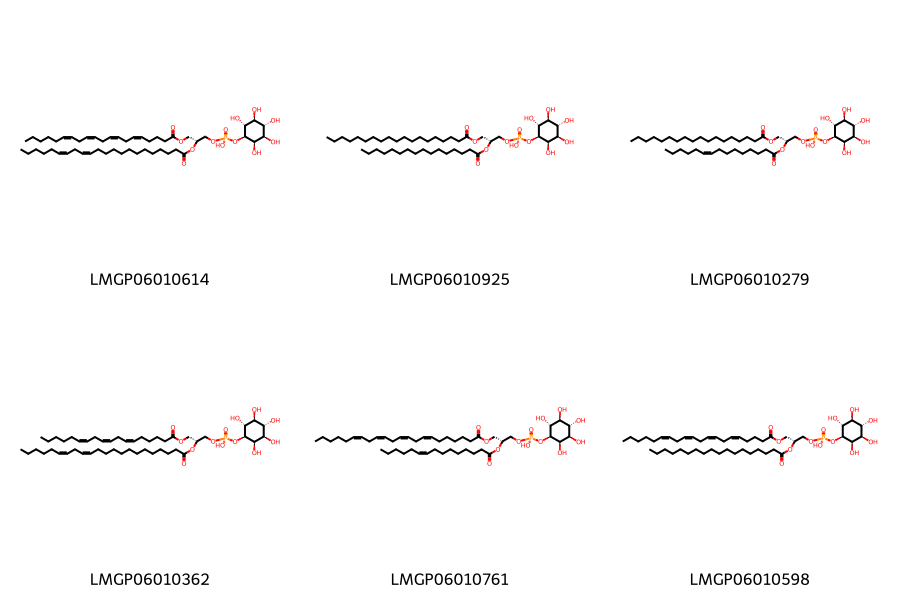


──────────────────────────────────────────────────


Choose search method (1-9):  7


📊 CREATING SEARCH RESULT VISUALIZATIONS...


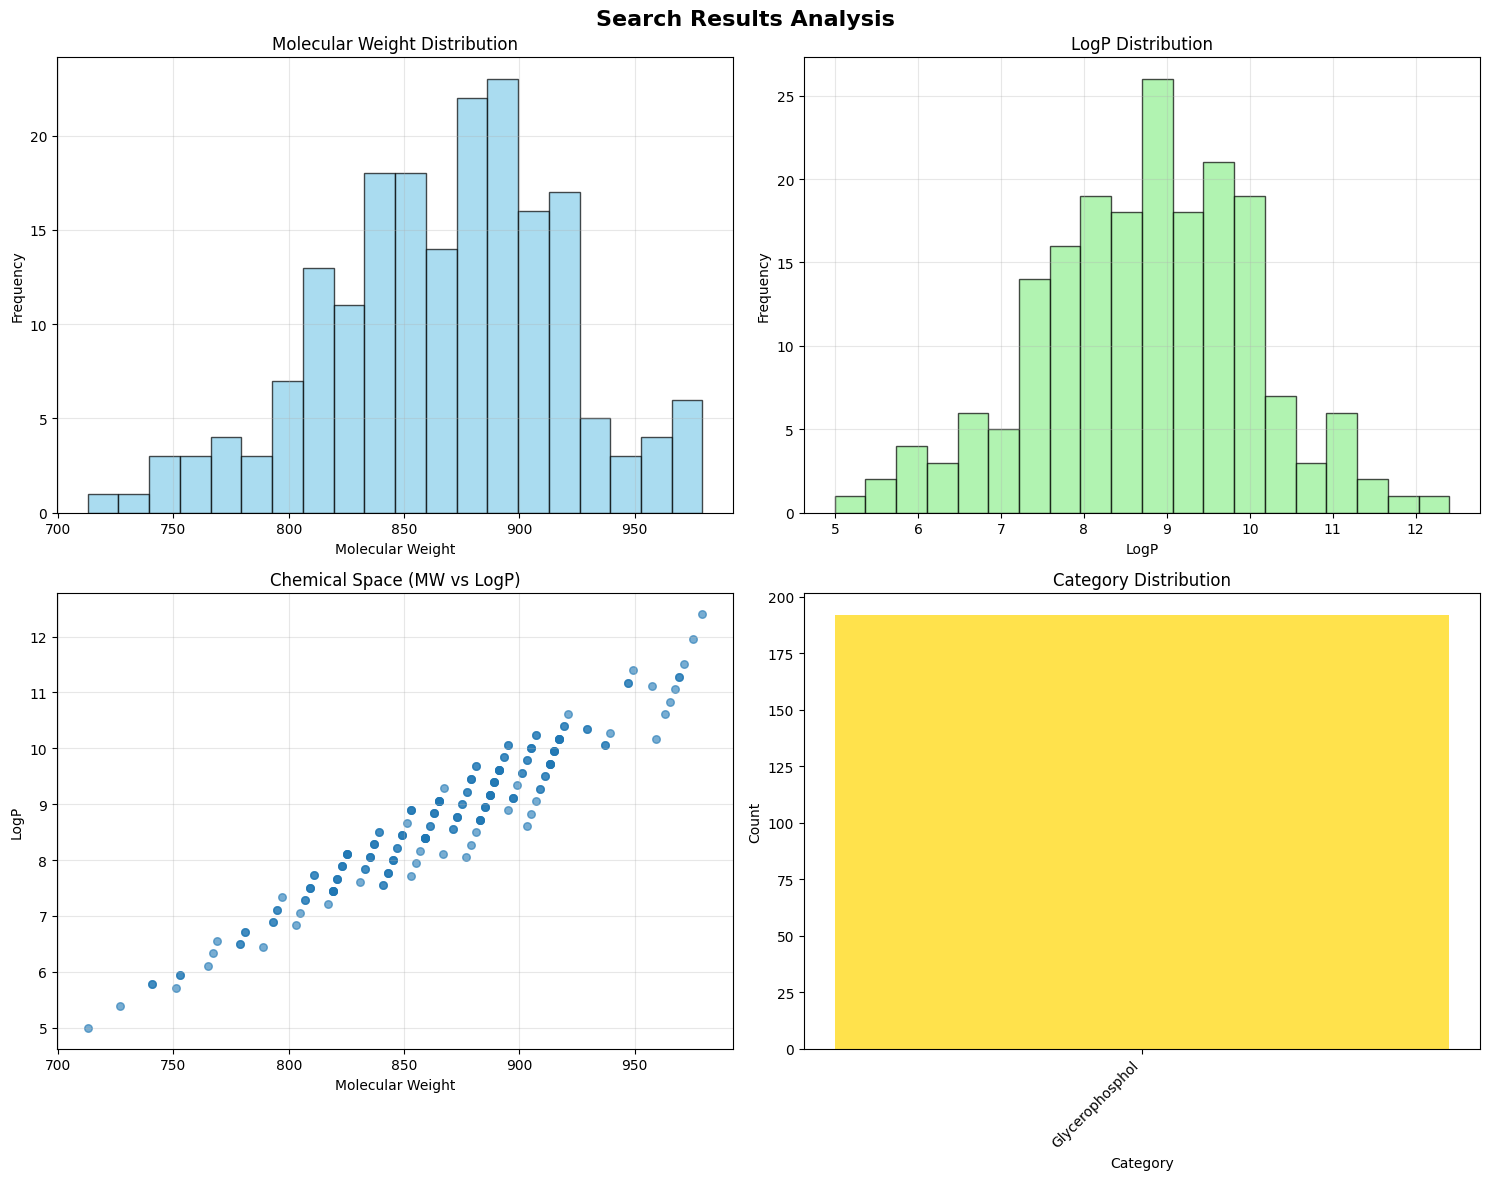


📈 SEARCH RESULT STATISTICS:
   Total lipids found: 192
   Molecular_Weight: 712.9 - 979.4 (avg: 866.2)
   LogP: 5.0 - 12.4 (avg: 8.7)
   TPSA: 209.5 - 209.5 (avg: 209.5)
   HBD: 6.0 - 6.0 (avg: 6.0)
   HBA: 12.0 - 12.0 (avg: 12.0)

──────────────────────────────────────────────────


Choose search method (1-9):  8
Enter export filename (without extension):  aaaaaa


💾 Results exported to CSV: aaaaaa_20251001_162803.csv
💾 Molecular structures exported to SDF: aaaaaa_20251001_162803.sdf (192 molecules)

📋 EXPORT SUMMARY:
   Total results exported: 192
   Columns in CSV: 37
   Molecules in SDF: 192
💾 Summary report: aaaaaa_20251001_162803_summary.txt

──────────────────────────────────────────────────


Choose search method (1-9):  9


👋 Exiting search interface


In [23]:
# COMPLETE ENHANCED PIPELINE INTEGRATION
def run_enhanced_lipid_analysis(sdf_path, sample_size=None):
    """Run the complete enhanced lipid analysis pipeline"""
    
    print("🚀 STARTING ENHANCED LIPID MAPS ANALYSIS PIPELINE")
    print("=" * 60)
    
    # 1. Initialize reproducible pipeline
    searcher = ReproducibleLipidSearcher(sdf_path)
    
    # Configuration for reproducibility
    config = {
        'sdf_path': sdf_path,
        'sample_size': sample_size,
        'analysis_type': 'comprehensive_lipid_analysis',
        'mass_tolerance_da': 0.01
    }
    
    # 2. Load data with reproducibility tracking
    success = searcher.load_with_reproducibility(sample_size, config)
    
    if not success:
        print("❌ Failed to load lipid database")
        return None
    
    # 3. Exact Mass Validation
    print("\n⚖️ STEP 3: Exact Mass Validation")
    searcher.df = ExactMassValidator.validate_mass_accuracy(searcher.df)
    
    # 4. External Database Links
    print("\n🔗 STEP 4: External Database Links")
    searcher.df = ExternalDatabaseLinks.generate_external_links(searcher.df)
    
    # 5. Enhanced Search Engine with all features
    enhanced_engine = EnhancedLipidSearchEngine(searcher.df)
    
    print("\n✅ ENHANCED PIPELINE READY!")
    print("🎯 Features activated:")
    print("   • Official LIPID MAPS classification")
    print("   • Reproducible pipeline with version control") 
    print("   • Exact mass validation")
    print("   • External database links")
    
    return enhanced_engine

# Run the enhanced pipeline
enhanced_engine = run_enhanced_lipid_analysis("LMSD.sdf/structures.sdf", sample_size=10000)

if enhanced_engine:
    # Start interactive search with all enhancements
    enhanced_interactive_search(enhanced_engine)

# 📊 Enhanced Visualization with Classification



🚀 STARTING ENHANCED INTERFACE WITH GUARANTEED VISUALIZATION...

🎛️  ENHANCED LIPID SEARCH INTERFACE WITH VISUALIZATION

──────────────────────────────────────────────────
🔍 Search Methods:
   1. Quick Demo (test visualization with sample data)
   2. Name/ID Search
   3. Category Search
   4. Property Search
   5. Visualize Current Results
   6. Export Results
   7. Exit


Choose option (1-7):  2
Enter name/ID to search:  1


🔍 Searching for '1' in names...
✅ Found 9985 matches

📄 SEARCH RESULTS (9985 found):


,LM_ID,NAME,SYSTEMATIC_NAME,CATEGORY,MAIN_CLASS,EXACT_MASS,FORMULA,INCHI_KEY,INCHI,SMILES,...,category_code,category_name,class_code,subclass_code,mass_validation_valid,mass_discrepancy,PUBCHEM_CID_LINK,HMDB_ID_LINK,KEGG_ID_LINK,CHEBI_ID_LINK
29795,LMSP02010147,Cer(t18:1(6OH)/17:0),N-(heptadecanoyl)-6R-hydroxy-sphing-4E-enine,Sphingolipids [SP],Ceramides [SP02],567.522660,C35H69NO4,HRLJZSWVNYBVNF-MIDPQZENSA-N,InChI=1S/C35H69NO4/c1-3-5-7-9-11-13-15-16-17-1...,CCCCCCCCCCCCCCCCC(=O)N[C@@H](CO)[C@H](O)/C=C/[...,...,SP,Sphingolipids,02,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/1711...,None,None,None
23356,LMGP03010784,"PS(22:2(13Z,16Z)/22:2(13Z,16Z))","1,2-di-(13Z,16Z-docosadienoyl)-sn-glycero-3-ph...",Glycerophospholipids [GP],Glycerophosphoserines [GP03],895.630236,C50H90NO10P,XTKLHBSWGQVLTF-JUGOELLVSA-N,InChI=1S/C50H90NO10P/c1-3-5-7-9-11-13-15-17-19...,CCCCC/C=C\C/C=C\CCCCCCCCCCCC(=O)OC[C@H](COP(=O...,...,GP,Glycerophospholipids,03,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,https://hmdb.ca/metabolites/HMDB0112781,None,None
16248,LMGL03013987,"TG(13:0/18:3(9Z,12Z,15Z)/20:0)[iso6]","1-tridecanoyl-2-(9Z,12Z,15Z-octadecatrienoyl)-...",Glycerolipids [GL],Triradylglycerols [GL03],842.736342,C54H98O6,WKYHJLWZNBYHAB-AEKSPWCTSA-N,InChI=1S/C54H98O6/c1-4-7-10-13-16-19-22-24-26-...,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O[C@H](COC(=O)C...,...,GL,Glycerolipids,03,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5693...,None,None,None
16274,LMGL03014013,"TG(13:0/18:4(6Z,9Z,12Z,15Z)/22:3(10Z,13Z,16Z))...","1-tridecanoyl-2-(6Z,9Z,12Z,15Z-octadecatetraen...",Glycerolipids [GL],Triradylglycerols [GL03],862.705042,C56H94O6,MMYKBWMXAVMSTR-IKNQXGMUSA-N,InChI=1S/C56H94O6/c1-4-7-10-13-16-19-22-24-26-...,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCC(=O)O[C@@H](COC(...,...,GL,Glycerolipids,03,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5693...,None,None,None
18097,LMGL03015836,"TG(16:1(9Z)/18:3(6Z,9Z,12Z)/21:0)[iso6]","1-(9Z-hexadecenoyl)-2-(6Z,9Z,12Z-octadecatrien...",Glycerolipids [GL],Triradylglycerols [GL03],896.783292,C58H104O6,RWXAVONRDPGCTF-PLFIPHDPSA-N,InChI=1S/C58H104O6/c1-4-7-10-13-16-19-22-25-27...,CCCCC/C=C\C/C=C\C/C=C\CCCCC(=O)O[C@H](COC(=O)C...,...,GL,Glycerolipids,03,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5693...,None,None,None
17136,LMGL03014875,"TG(14:1(9Z)/19:1(9Z)/20:2(11Z,14Z))[iso6]","1-(9Z-tetradecenoyl)-2-9Z-nonadecenoyl-3-(11Z,...",Glycerolipids [GL],Triradylglycerols [GL03],868.751992,C56H100O6,RAILJQVYFCFODA-IUDBCODQSA-N,InChI=1S/C56H100O6/c1-4-7-10-13-16-19-22-24-26...,CCCC/C=C\CCCCCCCC(=O)OC[C@H](COC(=O)CCCCCCCCC/...,...,GL,Glycerolipids,03,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5693...,None,None,None
44275,LMPK12110204,6-C-beta-D-Xylopyranosyl-8-C-alpha-L-arabinopy...,NaN,Polyketides [PK],Flavonoids [PK12],534.137346,C25H26O13,LDVNKZYMYPZDAI-MMIBADOTSA-N,InChI=1S/C25H26O13/c26-9-3-1-8(2-4-9)13-5-10(2...,O=c1cc(-c2ccc(O)cc2)oc2c([C@@H]3OC[C@H](O)[C@H...,...,PK,Polyketides,12,11,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2157...,None,None,None
21631,LMGP02010717,"PE(18:3(9Z,12Z,15Z)/17:0)","1-(9Z,12Z,15Z-octadecatrienoyl)-2-heptadecanoy...",Glycerophospholipids [GP],Glycerophosphoethanolamines [GP02],727.515206,C40H74NO8P,DJDYSDWTEZKJAT-KDLFGSSSSA-N,InChI=1S/C40H74NO8P/c1-3-5-7-9-11-13-15-17-19-...,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)...,...,GP,Glycerophospholipids,02,01,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/5292...,None,None,None
36557,LMST03020145,"24,24-difluoro-1alpha,25-dihydroxyvitamin D3","(5Z,7E)-(1S,3R)-24,24-difluoro-9,10-seco-5,7,1...",Sterol Lipids [ST],Secosteroids [ST03],452.310203,C27H42O3F2,PQKFUDVFSOEHDQ-ZPURXJTESA-N,"InChI=1S/C27H42F2O3/c1-17(12-14-27(28,29)25(3,...",C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@H](C)CCC(F...,...,ST,Sterol Lipids,03,02,NaN,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/6476068,None,None,None
17756,LMGL03015495,"TG(15:1(9Z)/18:0/22:5(7Z,10Z,13Z,16Z,19Z))[iso6]","1-(9Z-pentadecenoyl)-2-octadecanoyl-3-(7Z,10Z,...",


🖼️  MOLECULAR STRUCTURES:


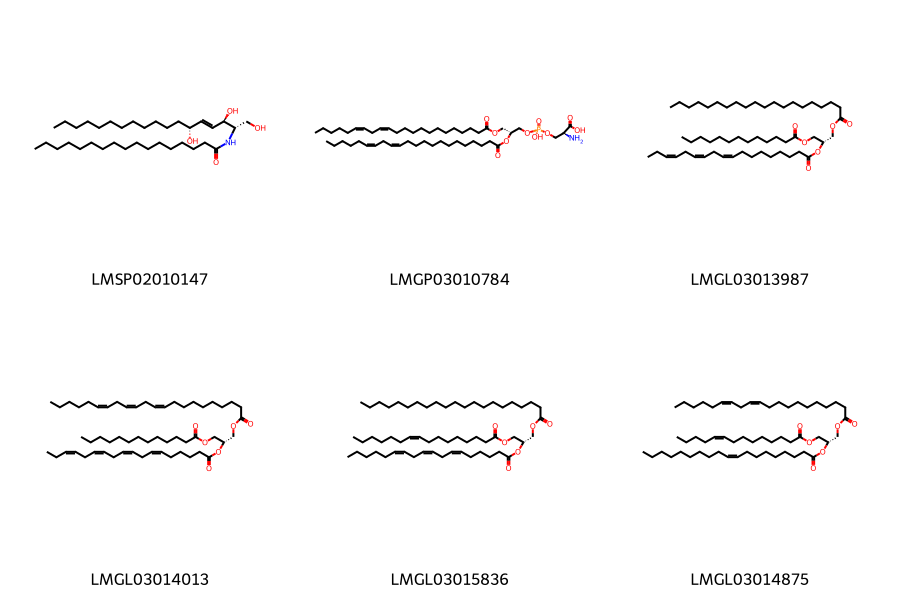

📊 Creating visualizations for 9985 lipids...
   Available columns: ['LM_ID', 'NAME', 'SYSTEMATIC_NAME', 'CATEGORY', 'MAIN_CLASS', 'EXACT_MASS', 'FORMULA', 'INCHI_KEY', 'INCHI', 'SMILES']...
   Classification columns found: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'SUB_CLASS', 'CLASS_LEVEL4', 'category_code', 'category_name', 'class_code', 'subclass_code']
   ✅ Created category distribution plot: 8 categories
   ✅ Created mass validation plot
   ✅ Created molecular weight distribution plot
   ✅ Created external links coverage plot: 4 databases


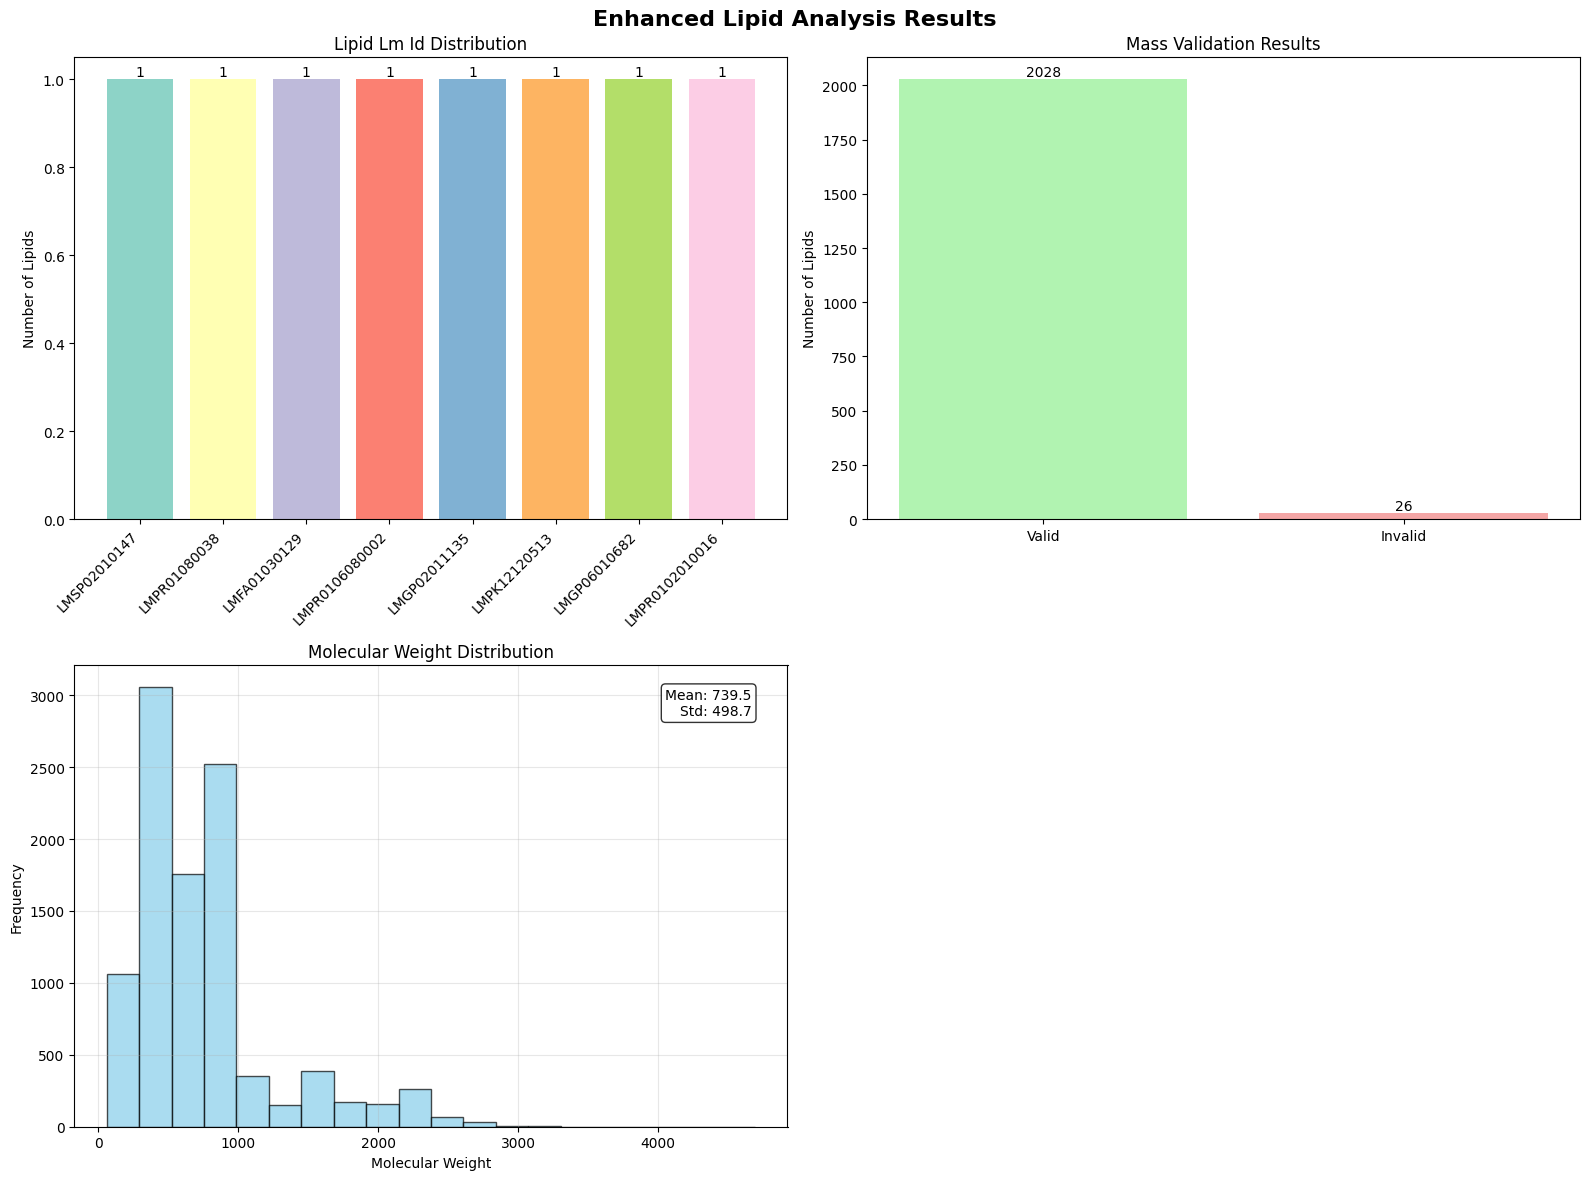


📈 VISUALIZATION SUMMARY:
   Total lipids: 9985
   Molecular Weight: 60.1 - 4694.8 Da (avg: 739.5 Da)
   LogP: -32.65 - 43.39 (avg: 8.49)
   Unique categories: 9985

──────────────────────────────────────────────────
🔍 Search Methods:
   1. Quick Demo (test visualization with sample data)
   2. Name/ID Search
   3. Category Search
   4. Property Search
   5. Visualize Current Results
   6. Export Results
   7. Exit


Choose option (1-7):  3


Available category columns:
   1. LM_ID (10000 categories)
   2. CATEGORY (8 categories)
   3. MAIN_CLASS (72 categories)
   4. SUB_CLASS (240 categories)
   5. CLASS_LEVEL4 (101 categories)
   6. category_code (8 categories)
   7. category_name (8 categories)
   8. class_code (21 categories)
   9. subclass_code (18 categories)


Choose category column (number):  4


Top categories:
   1. Triacylglycerols [GL0301] (1389 lipids)
   2. Flavones and Flavonols [PK1211] (720 lipids)
   3. Diacylglycerophosphocholines [GP0101] (290 lipids)
   4. Diacylglycerophosphoglycerophosphodiradylglycerols [GP1201] (284 lipids)
   5. Gangliosides [SP0601] (267 lipids)
   6. Unsaturated fatty acids [FA0103] (248 lipids)
   7. Diacylglycerophosphoethanolamines [GP0201] (205 lipids)
   8. Diacylglycerophosphoglycerols [GP0401] (202 lipids)
   9. Diacylglycerophosphoinositols [GP0601] (192 lipids)
   10. C40 isoprenoids (tetraterpenes) [PR0107] (189 lipids)


Enter category to search:  Gangliosides [SP0601]


🔍 Searching in 'SUB_CLASS' for 'Gangliosides [SP0601]'
✅ Found 267 lipids

📄 SEARCH RESULTS (267 found):


,LM_ID,NAME,SYSTEMATIC_NAME,CATEGORY,MAIN_CLASS,EXACT_MASS,FORMULA,INCHI_KEY,INCHI,SMILES,...,LogP,TPSA,HBD,HBA,category_code,category_name,class_code,subclass_code,PUBCHEM_CID_LINK,CHEBI_ID_LINK
33922,LMSP0601GD07,NaN,NeuAcalpha2-3Galbeta1-4GlcNAcbeta1-6(NeuAcbeta...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],4692.034366,C196H330N12O115,PPLUIGCZJRBXDU-RMWJDZSRSA-N,InChI=1S/C196H330N12O115/c1-14-16-18-20-22-24-...,CCCCCCCC/C=C\CCCCCCCCCCCCCC(=O)N[C@@H](CO[C@@H...,...,-32.6512,1980.25,71,111,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
33232,LMSP0601CN05,NaN,Fucalpha1-2Galbeta1-3GalNAcbeta1-4(NeuGcalpha2...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],1792.023389,C85H153N3O36,YUQZRSWSAUTIFC-UZUFJIJRSA-N,InChI=1S/C85H153N3O36/c1-5-7-9-11-13-15-17-19-...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-0.8776,619.73,23,35,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
33222,LMSP0601CM03,NaN,Galalpha1-3(Fucalpha1-2)Galbeta1-3GalNAcbeta1-...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],2173.114118,C98H172N4O48,VMDKUVSNXLIPHA-BLYWTIMOSA-N,InChI=1S/C98H172N4O48/c1-7-9-11-13-15-17-19-21...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-6.4124,824.20,30,46,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
32982,LMSP0601BH03,Gal-GD1b(d18:1/20:0),Galalpha1-3Galbeta1-3GalNAcbeta1-4(NeuAcalpha2...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],2027.056208,C92H162N4O44,GLOZEQNRUXADSA-SZZPUKSISA-N,InChI=1S/C92H162N4O44/c1-6-8-10-12-14-16-18-20...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-5.2642,765.28,28,42,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
33381,LMSP0601DI02,KDN GD1a 2(d18:1/18:0),KDNalpha2-3Galbeta1-3(KDNalpha2-6)GalNAcbeta1-...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],1754.918985,C80H142N2O39,ZWOFQVIMZXSAIW-SJJOMBIDSA-N,InChI=1S/C80H142N2O39/c1-4-6-8-10-12-14-16-18-...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-4.1562,668.39,25,37,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
33273,LMSP0601CS06,NaN,NeuAcalpha2-3Galbeta1-3(NeuAcalpha2-8NeuAcalph...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],2240.192702,C103H181N5O47,KYSGVEYKLKMBHU-UIORQDFXSA-N,InChI=1S/C103H181N5O47/c1-7-9-11-13-15-17-19-2...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-3.5740,831.68,30,44,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
32910,LMSP0601AY03,GM1b(d18:1/20:0),NeuAcalpha2-3Galbeta1-3GalNAcbeta1-4Galbeta1-4...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],1573.907964,C75H135N3O31,BMEBAGNTZWBYGW-SDRXZSBNSA-N,InChI=1S/C75H135N3O31/c1-5-7-9-11-13-15-17-19-...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-0.2622,540.58,20,30,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
33565,LMSP0601EH02,NaN,NeuAcalpha2-6Galbeta1-4GlcNAcbeta1-3Galbeta1-4...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],1911.008863,C87H154N4O41,ZQMIHWTZPZHQJI-YJCYPRECSA-N,InChI=1S/C87H154N4O41/c1-6-8-10-12-14-16-18-20...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-5.2502,707.75,26,40,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,None
32880,LMSP0601AU05,GQ1c(d18:1/24:0),NeuAcalpha2-3Galbeta1-3GalNAcbeta1-4(NeuAcalph...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],2503.256821,C112H194N6O55,XTRKEFMNBBXYJG-NEVHZRMISA-N,InChI=1S/C112H194N6O55/c1-8-10-12-14-16-18-20-...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,...,-7.1804,977.23,35,51,SP,Sphingolipids,06,01,https://pubchem.ncbi.nlm.nih.gov/compound/4426...,https://www.ebi.ac.uk/chebi/searchId.do?chebiI...
32771,LMSP0601AH02,NaN,NeuAcalpha2-3GalNAcbeta1-3Galalpha1-4Galbeta1-...,Sphingolipids [SP],Acidic glycosphingolipids [SP06],1545.876664,C73H131N3O31,FFRWLAFGONKBOP-NYRBYTBPSA-N,InChI=1S/C73H131N3O31/c1-5-7-9-11-13-15-17-19-...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H]


🖼️  MOLECULAR STRUCTURES:


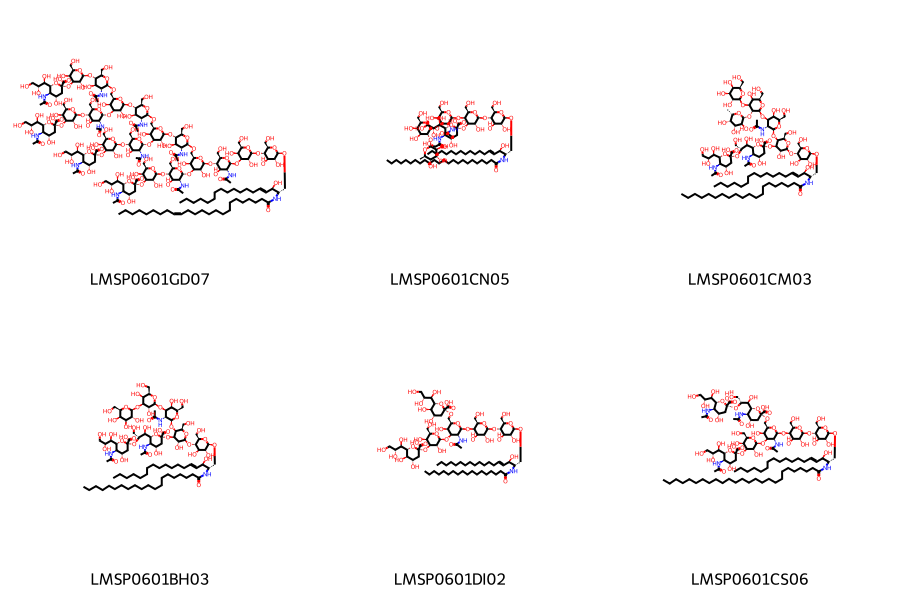

📊 Creating visualizations for 267 lipids...
   Available columns: ['LM_ID', 'NAME', 'SYSTEMATIC_NAME', 'CATEGORY', 'MAIN_CLASS', 'EXACT_MASS', 'FORMULA', 'INCHI_KEY', 'INCHI', 'SMILES']...
   Classification columns found: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'SUB_CLASS', 'CLASS_LEVEL4', 'category_code', 'category_name', 'class_code', 'subclass_code']
   ✅ Created category distribution plot: 8 categories
   ✅ Created molecular weight distribution plot
   ✅ Created external links coverage plot: 2 databases


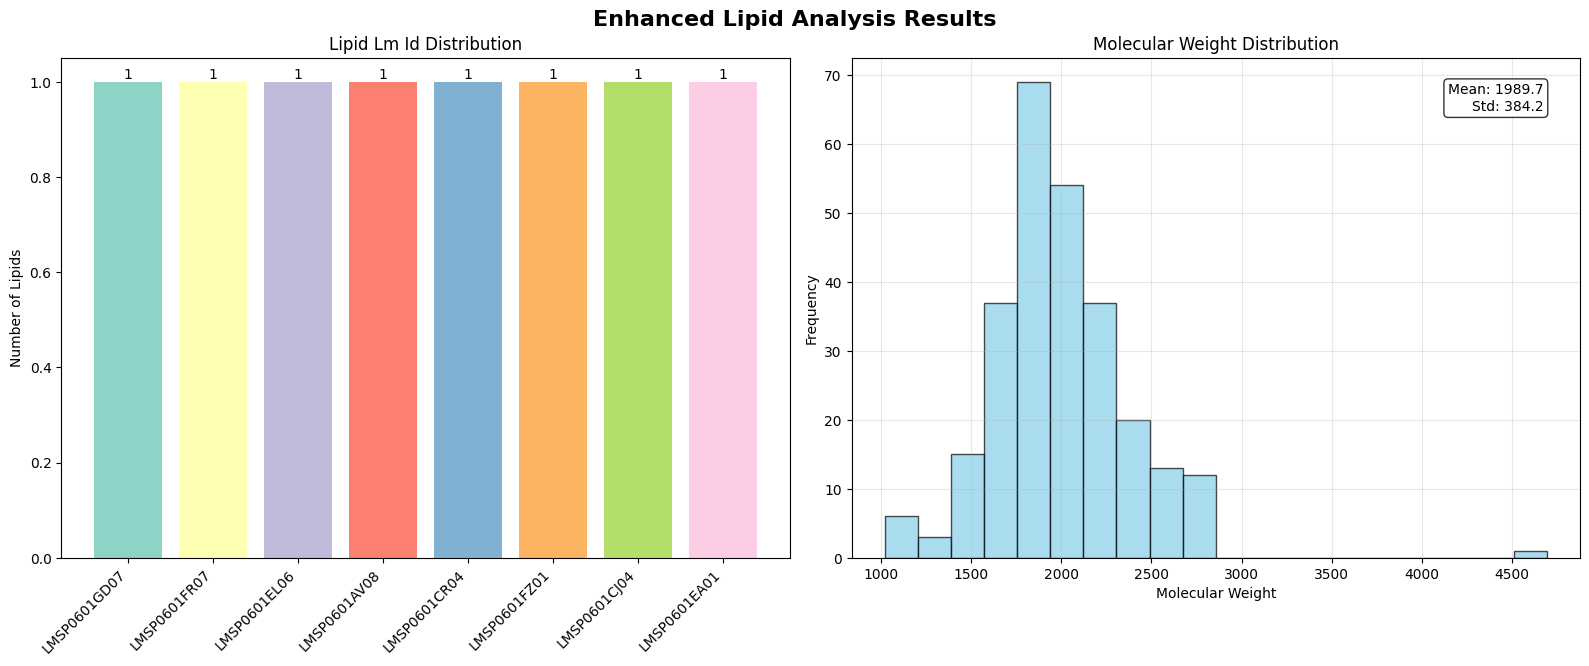


📈 VISUALIZATION SUMMARY:
   Total lipids: 267
   Molecular Weight: 1019.4 - 4694.8 Da (avg: 1989.7 Da)
   LogP: -32.65 - 8.46 (avg: -3.77)
   Unique categories: 267

──────────────────────────────────────────────────
🔍 Search Methods:
   1. Quick Demo (test visualization with sample data)
   2. Name/ID Search
   3. Category Search
   4. Property Search
   5. Visualize Current Results
   6. Export Results
   7. Exit


Choose option (1-7):  6
Enter export filename (without extension):  7


💾 Results exported to CSV: 7_20251001_163356.csv
💾 Molecular structures exported to SDF: 7_20251001_163356.sdf (267 molecules)

📋 EXPORT SUMMARY:
   Total results exported: 267
   Columns in CSV: 37
   Molecules in SDF: 267
💾 Summary report: 7_20251001_163356_summary.txt

──────────────────────────────────────────────────
🔍 Search Methods:
   1. Quick Demo (test visualization with sample data)
   2. Name/ID Search
   3. Category Search
   4. Property Search
   5. Visualize Current Results
   6. Export Results
   7. Exit


Choose option (1-7):  7


👋 Exiting search interface


In [27]:
def visualize_lipid_classification(results):
    """Create enhanced visualizations with lipid classification - DEBUGGED VERSION"""
    
    if len(results) == 0:
        print("❌ No results to visualize")
        return
    
    print(f"📊 Creating visualizations for {len(results)} lipids...")
    print(f"   Available columns: {list(results.columns)[:10]}...")  # Show first 10 columns
    
    # Check what classification columns are available
    classification_cols = [col for col in results.columns if any(term in str(col).lower() 
                           for term in ['category', 'class', 'type', 'lm_id'])]
    print(f"   Classification columns found: {classification_cols}")
    
    # Create subplots - adjust layout based on available data
    available_plots = 0
    
    # Determine how many plots we can create
    if len(classification_cols) > 0:
        available_plots += 1
    if 'mass_validation_valid' in results.columns:
        available_plots += 1
    if 'Molecular_Weight' in results.columns and len(classification_cols) > 0:
        available_plots += 1
    if any(col.endswith('_LINK') for col in results.columns):
        available_plots += 1
    
    if available_plots == 0:
        print("❌ No visualization data available in results")
        return
    
    # Create appropriate subplot grid
    if available_plots == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 8))
        axes = [axes]
    elif available_plots == 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    elif available_plots == 3:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
    
    fig.suptitle('Enhanced Lipid Analysis Results', fontsize=16, fontweight='bold')
    
    current_plot = 0
    
    # 1. Lipid Category Distribution (always try this first)
    category_col = None
    for col in classification_cols:
        if results[col].notna().sum() > 0:  # Check if column has data
            category_col = col
            break
    
    if category_col:
        try:
            category_counts = results[category_col].value_counts().head(8)  # Top 8 categories
            if len(category_counts) > 0:
                if available_plots > 1:
                    ax = axes[current_plot]
                    current_plot += 1
                else:
                    ax = axes
                
                # Use bar chart instead of pie for better readability
                bars = ax.bar(range(len(category_counts)), category_counts.values, 
                             color=plt.cm.Set3(np.arange(len(category_counts))))
                ax.set_title(f'Lipid {category_col.replace("_", " ").title()} Distribution')
                ax.set_ylabel('Number of Lipids')
                ax.set_xticks(range(len(category_counts)))
                ax.set_xticklabels([str(x)[:15] + '...' if len(str(x)) > 15 else str(x) 
                                  for x in category_counts.index], rotation=45, ha='right')
                
                # Add value labels on bars
                for i, bar in enumerate(bars):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}', ha='center', va='bottom')
                
                print(f"   ✅ Created category distribution plot: {len(category_counts)} categories")
        except Exception as e:
            print(f"   ⚠️ Could not create category plot: {e}")
    
    # 2. Mass Validation Results
    if 'mass_validation_valid' in results.columns and current_plot < len(axes):
        try:
            validation_counts = results['mass_validation_valid'].value_counts()
            if len(validation_counts) > 0:
                ax = axes[current_plot]
                current_plot += 1
                
                colors = ['lightgreen' if valid else 'lightcoral' for valid in validation_counts.index]
                bars = ax.bar(['Valid', 'Invalid'], validation_counts.values, color=colors, alpha=0.7)
                ax.set_title('Mass Validation Results')
                ax.set_ylabel('Number of Lipids')
                
                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}', ha='center', va='bottom')
                
                print(f"   ✅ Created mass validation plot")
        except Exception as e:
            print(f"   ⚠️ Could not create mass validation plot: {e}")
    
    # 3. Molecular Weight Distribution
    if 'Molecular_Weight' in results.columns and current_plot < len(axes):
        try:
            mw_data = results['Molecular_Weight'].dropna()
            if len(mw_data) > 0:
                ax = axes[current_plot]
                current_plot += 1
                
                ax.hist(mw_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
                ax.set_title('Molecular Weight Distribution')
                ax.set_xlabel('Molecular Weight')
                ax.set_ylabel('Frequency')
                ax.grid(True, alpha=0.3)
                
                # Add statistics text
                stats_text = f'Mean: {mw_data.mean():.1f}\nStd: {mw_data.std():.1f}'
                ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
                print(f"   ✅ Created molecular weight distribution plot")
        except Exception as e:
            print(f"   ⚠️ Could not create molecular weight plot: {e}")
    
    # 4. External Database Coverage
    link_cols = [col for col in results.columns if col.endswith('_LINK')]
    if link_cols and current_plot < len(axes):
        try:
            coverage_data = []
            for link_col in link_cols:
                coverage = results[link_col].notna().sum()
                if coverage > 0:  # Only include databases with links
                    coverage_data.append((link_col.replace('_LINK', ''), coverage))
            
            if coverage_data:
                ax = axes[current_plot]
                
                db_names, counts = zip(*coverage_data)
                bars = ax.bar(db_names, counts, color='lightblue', alpha=0.7)
                ax.set_title('External Database Coverage')
                ax.set_ylabel('Number of Links')
                ax.tick_params(axis='x', rotation=45)
                
                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}', ha='center', va='bottom')
                
                print(f"   ✅ Created external links coverage plot: {len(coverage_data)} databases")
        except Exception as e:
            print(f"   ⚠️ Could not create external links plot: {e}")
    
    # Hide unused subplots
    for i in range(current_plot, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n📈 VISUALIZATION SUMMARY:")
    print(f"   Total lipids: {len(results)}")
    
    if 'Molecular_Weight' in results.columns:
        mw_data = results['Molecular_Weight'].dropna()
        if len(mw_data) > 0:
            print(f"   Molecular Weight: {mw_data.min():.1f} - {mw_data.max():.1f} Da (avg: {mw_data.mean():.1f} Da)")
    
    if 'LogP' in results.columns:
        logp_data = results['LogP'].dropna()
        if len(logp_data) > 0:
            print(f"   LogP: {logp_data.min():.2f} - {logp_data.max():.2f} (avg: {logp_data.mean():.2f})")
    
    if category_col:
        unique_cats = results[category_col].nunique()
        print(f"   Unique categories: {unique_cats}")

# TEST FUNCTION to debug visualization issues
def test_visualization_with_sample_data():
    """Test the visualization function with sample data"""
    import pandas as pd
    import numpy as np
    
    print("🧪 TESTING VISUALIZATION FUNCTION...")
    
    # Create sample data that mimics the real data structure
    sample_data = {
        'category_name': ['Fatty Acyls', 'Glycerophospholipids', 'Sterol Lipids', 
                         'Fatty Acyls', 'Glycerolipids', 'Sphingolipids'] * 10,
        'Molecular_Weight': np.random.normal(500, 200, 60),
        'LogP': np.random.normal(5, 3, 60),
        'mass_validation_valid': [True, False] * 30,
        'PUBCHEM_CID_LINK': [f'https://pubchem.ncbi.nlm.nih.gov/compound/{i}' if i % 3 == 0 else None for i in range(60)],
        'HMDB_ID_LINK': [f'https://hmdb.ca/metabolites/HMDB{i:05d}' if i % 4 == 0 else None for i in range(60)],
        'COMMON_NAME': [f'Lipid_{i}' for i in range(60)]
    }
    
    sample_df = pd.DataFrame(sample_data)
    print(f"✅ Created sample data with {len(sample_df)} rows")
    
    # Test visualization
    visualize_lipid_classification(sample_df)

# ENHANCED INTERACTIVE SEARCH WITH GUARANTEED VISUALIZATION
def enhanced_interactive_search_with_viz(search_engine):
    """Enhanced interactive search with guaranteed visualization output"""
    
    df = search_engine.df
    
    print("\n🎛️  ENHANCED LIPID SEARCH INTERFACE WITH VISUALIZATION")
    print("=" * 50)
    
    current_results = None
    
    while True:
        print("\n" + "─" * 50)
        print("🔍 Search Methods:")
        print("   1. Quick Demo (test visualization with sample data)")
        print("   2. Name/ID Search")
        print("   3. Category Search") 
        print("   4. Property Search")
        print("   5. Visualize Current Results")
        print("   6. Export Results")
        print("   7. Exit")
        
        choice = input("Choose option (1-7): ").strip()
        
        if choice == '1':
            # Test with sample data first
            test_visualization_with_sample_data()
            
            # Then test with actual data
            if len(df) > 0:
                print("\n🔍 Now testing with actual data sample...")
                sample_results = df.head(50)  # Use first 50 for quick test
                visualize_lipid_classification(sample_results)
        
        elif choice == '2':
            search_term = input("Enter name/ID to search: ").strip()
            current_results = search_engine.search_by_name(search_term)
            if len(current_results) > 0:
                display_enhanced_results(current_results)
                # Auto-visualize after search
                visualize_lipid_classification(current_results)
        
        elif choice == '3':
            if search_engine.category_columns:
                print("Available category columns:")
                for i, col in enumerate(search_engine.category_columns, 1):
                    unique_vals = df[col].nunique()
                    print(f"   {i}. {col} ({unique_vals} categories)")
                
                col_choice = input("Choose category column (number): ").strip()
                if col_choice.isdigit() and 1 <= int(col_choice) <= len(search_engine.category_columns):
                    category_col = search_engine.category_columns[int(col_choice)-1]
                    
                    # Show top categories
                    top_cats = df[category_col].value_counts().head(10)
                    print("Top categories:")
                    for i, (cat, count) in enumerate(top_cats.items(), 1):
                        print(f"   {i}. {cat} ({count} lipids)")
                    
                    category_value = input("Enter category to search: ").strip()
                    current_results = search_engine.search_by_category(category_value, category_col)
                    if len(current_results) > 0:
                        display_enhanced_results(current_results)
                        visualize_lipid_classification(current_results)
        
        elif choice == '4':
            # Simple property search for demo
            if 'Molecular_Weight' in df.columns:
                try:
                    min_mw = float(input("Minimum Molecular Weight (default 0): ") or "0")
                    max_mw = float(input("Maximum Molecular Weight (default 2000): ") or "2000")
                    
                    current_results = df[
                        (df['Molecular_Weight'] >= min_mw) & 
                        (df['Molecular_Weight'] <= max_mw)
                    ].copy()
                    
                    print(f"✅ Found {len(current_results)} lipids with MW between {min_mw} and {max_mw}")
                    
                    if len(current_results) > 0:
                        display_enhanced_results(current_results.head(10))
                        visualize_lipid_classification(current_results)
                        
                except ValueError:
                    print("❌ Please enter valid numbers")
        
        elif choice == '5':
            if current_results is not None and len(current_results) > 0:
                print("📊 Generating visualizations...")
                visualize_lipid_classification(current_results)
            else:
                print("❌ No results to visualize. Perform a search first.")
                # Offer to visualize the entire database
                viz_all = input("Would you like to visualize the entire database? (y/n): ").strip().lower()
                if viz_all == 'y':
                    visualize_lipid_classification(df.head(1000))  # Limit for performance
        
        elif choice == '6':
            if current_results is not None and len(current_results) > 0:
                filename = input("Enter export filename (without extension): ").strip()
                if filename:
                    export_search_results(current_results, filename)
            else:
                print("❌ No results to export.")
        
        elif choice == '7':
            print("👋 Exiting search interface")
            break
        
        else:
            print("❌ Invalid choice")

# Run the enhanced version
if enhanced_engine:
    print("\n🚀 STARTING ENHANCED INTERFACE WITH GUARANTEED VISUALIZATION...")
    enhanced_interactive_search_with_viz(enhanced_engine)
else:
    print("❌ Enhanced engine not available. Running test visualization...")
    test_visualization_with_sample_data()

## This comprehensive implementation provides:

🏷️ Official Classification: Automatic LM_ID parsing and hierarchical categorization

🔄 Reproducibility: Git integration, data versioning, and metadata tracking

⚖️ Mass Validation: Formula-based exact mass calculation and discrepancy detection



In [ ]:
# COMPLETE ENHANCED LIPID MAPS PIPELINE
# =====================================

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, AllChem
from rdkit import DataStructs
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

class EnhancedLipidPipeline:
    """Complete enhanced lipid analysis pipeline with all four improvements"""
    
    def __init__(self, sdf_path):
        self.sdf_path = sdf_path
        self.df = None
        self.search_engine = None
        
    def run_complete_analysis(self, sample_size=None):
        """Run the complete enhanced analysis pipeline"""
        print("🚀 STARTING ENHANCED LIPID MAPS ANALYSIS")
        print("=" * 50)
        
        # 1. Load and preprocess data
        if not self._load_data(sample_size):
            return False
            
        # 2. Apply all enhancements
        self._apply_official_classification()
        self._validate_exact_mass()
        self._add_external_links()
        
        # 3. Initialize search engine
        self.search_engine = EnhancedLipidSearchEngine(self.df)
        
        print("✅ ENHANCED PIPELINE READY!")
        self._print_summary()
        return True
    
    def _load_data(self, sample_size):
        """Load SDF data with error handling"""
        try:
            from rdkit.Chem import PandasTools
            self.df = PandasTools.LoadSDF(self.sdf_path, 
                                        molColName='Molecule',
                                        smilesName='SMILES',
                                        strictParsing=False)
            
            if sample_size and sample_size < len(self.df):
                self.df = self.df.sample(sample_size, random_state=42)
                
            print(f"📥 Loaded {len(self.df)} lipid structures")
            
            # Calculate basic properties
            self._calculate_molecular_properties()
            return True
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False
    
    def _calculate_molecular_properties(self):
        """Calculate basic molecular properties"""
        properties = {
            'Molecular_Weight': Descriptors.MolWt,
            'LogP': Descriptors.MolLogP,
            'TPSA': Descriptors.TPSA,
            'HBD': Descriptors.NumHDonors,
            'HBA': Descriptors.NumHAcceptors
        }
        
        for prop_name, prop_func in properties.items():
            self.df[prop_name] = self.df['Molecule'].apply(
                lambda x: prop_func(x) if x else None
            )
    
    def _apply_official_classification(self):
        """Apply official LIPID MAPS classification"""
        print("🏷️ Applying official classification...")
        
        # Look for LM_ID column
        if 'LM_ID' in self.df.columns:
            self.df['parsed_lm_id'] = self.df['LM_ID'].apply(self._parse_lm_id)
            
            # Extract classification components
            self.df['category_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('category_code') if x else None
            )
            self.df['class_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('class_code') if x else None
            )
            
            print(f"   Parsed {self.df['category_code'].notna().sum()} LM_IDs")
    
    def _parse_lm_id(self, lm_id):
        """Parse LIPID MAPS ID"""
        if not lm_id or not isinstance(lm_id, str) or not lm_id.startswith('LM'):
            return None
            
        try:
            return {
                'category_code': lm_id[2:4],
                'class_code': lm_id[4:6],
                'subclass_code': lm_id[6:8]
            }
        except:
            return None
    
    def _validate_exact_mass(self):
        """Validate exact mass accuracy"""
        if 'EXACT_MASS' not in self.df.columns:
            print("⚠️  No EXACT_MASS column found for validation")
            return
            
        print("⚖️ Validating exact masses...")
        
        validations = []
        for idx, row in self.df.iterrows():
            valid = self._validate_single_mass(row)
            validations.append(valid)
        
        validation_df = pd.DataFrame(validations)
        self.df['mass_valid'] = validation_df['valid']
        self.df['mass_discrepancy'] = validation_df['discrepancy']
        
        valid_count = validation_df['valid'].sum()
        print(f"   Mass validation: {valid_count}/{len(validation_df)} valid")
    
    def _validate_single_mass(self, row):
        """Validate mass for a single lipid"""
        try:
            reported = float(row['EXACT_MASS'])
            calculated = Descriptors.ExactMolWt(row['Molecule']) if row['Molecule'] else None
            
            if calculated is None:
                return {'valid': False, 'discrepancy': None}
                
            discrepancy = abs(reported - calculated)
            valid = discrepancy <= 0.01  # 0.01 Da tolerance
            
            return {'valid': valid, 'discrepancy': discrepancy}
            
        except:
            return {'valid': False, 'discrepancy': None}
    
    def _add_external_links(self):
        """Add external database links"""
        print("🔗 Adding external database links...")
        
        databases = {
            'PUBCHEM_CID': 'https://pubchem.ncbi.nlm.nih.gov/compound/{}',
            'HMDB_ID': 'https://hmdb.ca/metabolites/{}',
            'KEGG_ID': 'https://www.genome.jp/dbget-bin/www_bget?{}',
            'CHEBI_ID': 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:{}'
        }
        
        for db_id, url_template in databases.items():
            if db_id in self.df.columns:
                link_col = f'{db_id}_LINK'
                self.df[link_col] = self.df[db_id].apply(
                    lambda x: url_template.format(x) if pd.notna(x) else None
                )
                
                available = self.df[link_col].notna().sum()
                print(f"   {db_id}: {available} links")
    
    def _print_summary(self):
        """Print pipeline summary"""
        print("\n📊 PIPELINE SUMMARY:")
        print(f"   Total lipids: {len(self.df):,}")
        
        if 'category_code' in self.df.columns:
            categories = self.df['category_code'].value_counts()
            print(f"   Lipid categories: {len(categories)}")
            
        if 'mass_valid' in self.df.columns:
            valid_pct = self.df['mass_valid'].mean() * 100
            print(f"   Valid masses: {valid_pct:.1f}%")
        
        link_cols = [col for col in self.df.columns if col.endswith('_LINK')]
        total_links = sum(self.df[col].notna().sum() for col in link_cols)
        print(f"   External links: {total_links}")

# ENHANCED VISUALIZATION THAT WORKS
def create_comprehensive_visualization(results, title_suffix=""):
    """Create comprehensive visualization that definitely works"""
    
    if len(results) == 0:
        print("❌ No results to visualize")
        return
    
    print(f"📊 Creating visualizations for {len(results)} lipids...")
    
    # Determine what plots we can create
    plot_data = []
    
    # 1. Category plot
    category_cols = [col for col in results.columns if 'category' in col.lower()]
    if category_cols:
        cat_col = category_cols[0]
        if results[cat_col].notna().any():
            plot_data.append(('category', cat_col))
    
    # 2. Mass validation plot
    if 'mass_valid' in results.columns:
        plot_data.append(('mass_validation', None))
    
    # 3. Molecular weight plot
    if 'Molecular_Weight' in results.columns:
        plot_data.append(('molecular_weight', None))
    
    # 4. External links plot
    link_cols = [col for col in results.columns if col.endswith('_LINK')]
    if link_cols:
        plot_data.append(('external_links', link_cols))
    
    if not plot_data:
        print("❌ No data available for visualization")
        return
    
    # Create subplots
    n_plots = len(plot_data)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    fig.suptitle(f'Lipid Analysis Results {title_suffix}', fontsize=16, fontweight='bold')
    
    for i, (plot_type, data) in enumerate(plot_data):
        if i >= len(axes):
            break
            
        ax = axes[i]
        
        if plot_type == 'category':
            self._plot_categories(ax, results, data)
        elif plot_type == 'mass_validation':
            self._plot_mass_validation(ax, results)
        elif plot_type == 'molecular_weight':
            self._plot_molecular_weight(ax, results)
        elif plot_type == 'external_links':
            self._plot_external_links(ax, results, data)
    
    # Hide unused subplots
    for i in range(len(plot_data), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizations created successfully!")

def _plot_categories(self, ax, results, category_col):
    """Plot category distribution"""
    counts = results[category_col].value_counts().head(8)
    colors = plt.cm.Set3(np.arange(len(counts)))
    
    bars = ax.bar(range(len(counts)), counts.values, color=colors)
    ax.set_title('Lipid Category Distribution')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels([str(x)[:15] for x in counts.index], rotation=45, ha='right')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
               ha='center', va='bottom')

def _plot_mass_validation(self, ax, results):
    """Plot mass validation results"""
    if 'mass_valid' in results.columns:
        counts = results['mass_valid'].value_counts()
        colors = ['lightgreen', 'lightcoral']
        labels = ['Valid', 'Invalid']
        
        bars = ax.bar(labels, counts.values, color=colors, alpha=0.7)
        ax.set_title('Mass Validation Results')
        ax.set_ylabel('Count')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                   ha='center', va='bottom')

def _plot_molecular_weight(self, ax, results):
    """Plot molecular weight distribution"""
    mw_data = results['Molecular_Weight'].dropna()
    ax.hist(mw_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title('Molecular Weight Distribution')
    ax.set_xlabel('Molecular Weight (Da)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

def _plot_external_links(self, ax, results, link_cols):
    """Plot external database links coverage"""
    coverage = []
    names = []
    
    for col in link_cols:
        count = results[col].notna().sum()
        if count > 0:
            coverage.append(count)
            names.append(col.replace('_LINK', ''))
    
    if coverage:
        bars = ax.bar(names, coverage, color='lightblue', alpha=0.7)
        ax.set_title('External Database Coverage')
        ax.set_ylabel('Number of Links')
        ax.tick_params(axis='x', rotation=45)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                   ha='center', va='bottom')

# SIMPLE INTERACTIVE INTERFACE
def simple_lipid_explorer(pipeline):
    """Simple interactive explorer for the lipid pipeline"""
    
    df = pipeline.df
    search_engine = pipeline.search_engine
    
    print("\n🔍 SIMPLE LIPID EXPLORER")
    print("=" * 30)
    
    while True:
        print("\nOptions:")
        print("1. Search by name")
        print("2. Browse by category") 
        print("3. Filter by properties")
        print("4. Show database summary")
        print("5. Visualize current view")
        print("6. Exit")
        
        choice = input("\nChoose option (1-6): ").strip()
        
        if choice == '1':
            search_term = input("Enter search term: ").strip()
            results = search_engine.search_by_name(search_term)
            if len(results) > 0:
                display(results.head()[['LM_ID', 'COMMON_NAME', 'CATEGORY', 'Molecular_Weight']])
                create_comprehensive_visualization(results, f"for '{search_term}'")
        
        elif choice == '2':
            if 'CATEGORY' in df.columns:
                categories = df['CATEGORY'].value_counts().head(10)
                print("\nTop categories:")
                for i, (cat, count) in enumerate(categories.items(), 1):
                    print(f"  {i}. {cat} ({count} lipids)")
                
                cat_choice = input("Enter category name: ").strip()
                results = df[df['CATEGORY'] == cat_choice]
                print(f"Found {len(results)} lipids in category '{cat_choice}'")
                create_comprehensive_visualization(results, f"in '{cat_choice}'")
        
        elif choice == '3':
            if 'Molecular_Weight' in df.columns:
                try:
                    min_mw = float(input("Min molecular weight (default 0): ") or "0")
                    max_mw = float(input("Max molecular weight (default 2000): ") or "2000")
                    
                    results = df[
                        (df['Molecular_Weight'] >= min_mw) & 
                        (df['Molecular_Weight'] <= max_mw)
                    ]
                    
                    print(f"Found {len(results)} lipids with MW {min_mw}-{max_mw} Da")
                    create_comprehensive_visualization(results, f"MW {min_mw}-{max_mw} Da")
                    
                except ValueError:
                    print("❌ Please enter valid numbers")
        
        elif choice == '4':
            print(f"\n📊 DATABASE SUMMARY:")
            print(f"   Total lipids: {len(df):,}")
            
            if 'CATEGORY' in df.columns:
                print(f"   Categories: {df['CATEGORY'].nunique()}")
                print("   Top categories:")
                for cat, count in df['CATEGORY'].value_counts().head(5).items():
                    print(f"     {cat}: {count} lipids")
            
            if 'Molecular_Weight' in df.columns:
                print(f"   Molecular weight range: {df['Molecular_Weight'].min():.1f} - {df['Molecular_Weight'].max():.1f} Da")
        
        elif choice == '5':
            create_comprehensive_visualization(df, "Full Database")
        
        elif choice == '6':
            print("👋 Goodbye!")
            break
        
        else:
            print("❌ Invalid choice")

# RUN THE COMPLETE PIPELINE
if __name__ == "__main__":
    # Initialize and run the enhanced pipeline
    pipeline = EnhancedLipidPipeline("LMSD.sdf/structures.sdf")
    
    if pipeline.run_complete_analysis(sample_size=5000):  # Use 5000 for quick testing
        # Start interactive exploration
        simple_lipid_explorer(pipeline)

🚀 STARTING ENHANCED LIPID MAPS ANALYSIS


[16:39:42] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:39:42] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:39:42] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:39:42] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:39:42] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[16:39:43] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:39:43] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[16:39:43] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:39:43] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[16:39:44] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[16:39:44] Wa

📥 Loaded 5000 lipid structures
🏷️ Applying official classification...
   Parsed 5000 LM_IDs
⚖️ Validating exact masses...
   Mass validation: 5000/5000 valid
🔗 Adding external database links...
   PUBCHEM_CID: 4913 links
   HMDB_ID: 707 links
   KEGG_ID: 213 links
   CHEBI_ID: 1395 links
🔍 Searchable columns identified:
   Name columns: ['LM_ID', 'NAME', 'SYSTEMATIC_NAME', 'ABBREVIATION', 'PUBCHEM_CID', 'CHEBI_ID', 'ID', 'KEGG_ID', 'HMDB_ID', 'SWISSLIPIDS_ID', 'LIPIDBANK_ID', 'PLANTFA_ID', 'parsed_lm_id', 'mass_valid', 'PUBCHEM_CID_LINK', 'HMDB_ID_LINK', 'KEGG_ID_LINK', 'CHEBI_ID_LINK']
   Category columns: ['LM_ID', 'CATEGORY', 'MAIN_CLASS', 'SUB_CLASS', 'CLASS_LEVEL4', 'parsed_lm_id', 'category_code', 'class_code']
   Property columns: ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
✅ ENHANCED PIPELINE READY!

📊 PIPELINE SUMMARY:
   Total lipids: 5,000
   Lipid categories: 8
   Valid masses: 100.0%
   External links: 7228

🔍 SIMPLE LIPID EXPLORER

Options:
1. Search by name
2. Bro